In [1]:
# !pip install tabpfn --no-index --find-links=file:///kaggle/input/pip-packages-icr/pip-packages
# !mkdir -p /opt/conda/lib/python3.10/site-packages/tabpfn/models_diff
# !cp /kaggle/input/pip-packages-icr/pip-packages/prior_diff_real_checkpoint_n_0_epoch_100.cpkt /opt/conda/lib/python3.10/site-packages/tabpfn/models_diff/

In [2]:
%%HTML
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 95%; }
    div#maintoolbar-container { width: 99%; }
</style>

In [181]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder,normalize
# from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.impute import SimpleImputer
# import imblearn
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# import xgboost
# import inspect
# from collections import defaultdict
# from tabpfn import TabPFNClassifier
# import warnings
# warnings.filterwarnings('ignore')

In [182]:
# train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
# test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
# sample = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')
# greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')

In [183]:
# first_category = train.EJ.unique()[0]
# train.EJ = train.EJ.eq(first_category).astype('int')
# test.EJ = test.EJ.eq(first_category).astype('int')

In [184]:
# train.EJ

In [185]:
# def random_under_sampler(df):
#     # Calculate the number of samples for each label. 
#     neg, pos = np.bincount(df['Class'])

#     # Choose the samples with class label `1`.
#     one_df = df.loc[df['Class'] == 1] 
#     # Choose the samples with class label `0`.
#     zero_df = df.loc[df['Class'] == 0]
#     # Select `pos` number of negative samples.
#     # This makes sure that we have equal number of samples for each label.
#     zero_df = zero_df.sample(n=pos)

#     # Join both label dataframes.
#     undersampled_df = pd.concat([zero_df, one_df])

#     # Shuffle the data and return
#     return undersampled_df.sample(frac = 1)

In [186]:
# train_good = random_under_sampler(train)

In [187]:
# train_good.shape

In [188]:
# sum(train_good.Class == 1)

In [189]:
# predictor_columns = [n for n in train.columns if n != 'Class' and n != 'Id']
# x= train[predictor_columns]
# y = train['Class']

In [190]:
# from sklearn.model_selection import KFold as KF, GridSearchCV
# cv_outer = KF(n_splits = 10, shuffle=True, random_state=42)
# cv_inner = KF(n_splits = 5, shuffle=True, random_state=42)

In [191]:
# def balanced_log_loss(y_true, y_pred):
#     # y_true: correct labels 0, 1
#     # y_pred: predicted probabilities of class=1
#     # calculate the number of observations for each class
#     N_0 = np.sum(1 - y_true)
#     N_1 = np.sum(y_true)
#     # calculate the weights for each class to balance classes
#     w_0 = 1 / N_0
#     w_1 = 1 / N_1
#     # calculate the predicted probabilities for each class
#     p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
#     p_0 = 1 - p_1
#     # calculate the summed log loss for each class
#     log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
#     log_loss_1 = -np.sum(y_true * np.log(p_1))
#     # calculate the weighted summed logarithmic loss
#     # (factgor of 2 included to give same result as LL with balanced input)
#     balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
#     # return the average log loss
#     return balanced_log_loss/(N_0+N_1)

In [192]:
# class Ensemble():
#     def __init__(self):
#         self.imputer = SimpleImputer(missing_values=np.nan, strategy='median')

#         self.classifiers =[xgboost.XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.2,subsample=0.9,colsample_bytree=0.85),
#                            xgboost.XGBClassifier(),
#                            TabPFNClassifier(N_ensemble_configurations=24),
#                           TabPFNClassifier(N_ensemble_configurations=64)]
    
#     def fit(self,X,y):
#         y = y.values
#         unique_classes, y = np.unique(y, return_inverse=True)
#         self.classes_ = unique_classes
#         first_category = X.EJ.unique()[0]
#         X.EJ = X.EJ.eq(first_category).astype('int')
#         X = self.imputer.fit_transform(X)
# #         X = normalize(X,axis=0)
#         for classifier in self.classifiers:
#             if classifier==self.classifiers[2] or classifier==self.classifiers[3]:
#                 classifier.fit(X,y,overwrite_warning =True)
#             else :
#                 classifier.fit(X, y)
     
#     def predict_proba(self, x):
#         x = self.imputer.transform(x)
# #         x = normalize(x,axis=0)
#         probabilities = np.stack([classifier.predict_proba(x) for classifier in self.classifiers])
#         averaged_probabilities = np.mean(probabilities, axis=0)
#         class_0_est_instances = averaged_probabilities[:, 0].sum()
#         others_est_instances = averaged_probabilities[:, 1:].sum()
#         # Weighted probabilities based on class imbalance
#         new_probabilities = averaged_probabilities * np.array([[1/(class_0_est_instances if i==0 else others_est_instances) for i in range(averaged_probabilities.shape[1])]])
#         return new_probabilities / np.sum(new_probabilities, axis=1, keepdims=1)

In [193]:
# from tqdm.notebook import tqdm

In [194]:
# def training(model, x,y,y_meta):
#     outer_results = list()
#     best_loss = np.inf
#     split = 0
#     splits = 5
#     for train_idx,val_idx in tqdm(cv_inner.split(x), total = splits):
#         split+=1
#         x_train, x_val = x.iloc[train_idx],x.iloc[val_idx]
#         y_train, y_val = y_meta.iloc[train_idx], y.iloc[val_idx]
                
#         model.fit(x_train, y_train)
#         y_pred = model.predict_proba(x_val)
#         probabilities = np.concatenate((y_pred[:,:1], np.sum(y_pred[:,1:], 1, keepdims=True)), axis=1)
#         p0 = probabilities[:,:1]
#         p0[p0 > 0.86] = 1
#         p0[p0 < 0.14] = 0
#         y_p = np.empty((y_pred.shape[0],))
#         for i in range(y_pred.shape[0]):
#             if p0[i]>=0.5:
#                 y_p[i]= False
#             else :
#                 y_p[i]=True
#         y_p = y_p.astype(int)
#         loss = balanced_log_loss(y_val,y_p)

#         if loss<best_loss:
#             best_model = model
#             best_loss = loss
#             print('best_model_saved')
#         outer_results.append(loss)
#         print('>val_loss=%.5f, split = %.1f' % (loss,split))
#     print('LOSS: %.5f' % (np.mean(outer_results)))
#     return best_model

In [195]:
# from datetime import datetime
# times = greeks.Epsilon.copy()
# times[greeks.Epsilon != 'Unknown'] = greeks.Epsilon[greeks.Epsilon != 'Unknown'].map(lambda x: datetime.strptime(x,'%m/%d/%Y').toordinal())
# times[greeks.Epsilon == 'Unknown'] = np.nan

In [196]:
# train_pred_and_time = pd.concat((train, times), axis=1)
# test_predictors = test[predictor_columns]
# first_category = test_predictors.EJ.unique()[0]
# test_predictors.EJ = test_predictors.EJ.eq(first_category).astype('int')
# test_pred_and_time = np.concatenate((test_predictors, np.zeros((len(test_predictors), 1)) + train_pred_and_time.Epsilon.max() + 1), axis=1)

In [197]:
# ros = RandomOverSampler(random_state=42)

# train_ros, y_ros = ros.fit_resample(train_pred_and_time, greeks.Alpha)
# print('Original dataset shape')
# print(greeks.Alpha.value_counts())
# print('Resample dataset shape')
# print( y_ros.value_counts())

In [198]:
# x_ros = train_ros.drop(['Class', 'Id'],axis=1)
# y_ = train_ros.Class

In [199]:
# yt = Ensemble()

In [200]:
# m = training(yt,x_ros,y_,y_ros)

In [201]:
# y_.value_counts()/y_.shape[0]

In [202]:
# y_pred = m.predict_proba(test_pred_and_time)
# probabilities = np.concatenate((y_pred[:,:1], np.sum(y_pred[:,1:], 1, keepdims=True)), axis=1)
# p0 = probabilities[:,:1]
# p0[p0 > 0.59] = 1 
# p0[p0 < 0.28] = 0

In [203]:
# submission0 = pd.DataFrame(test["Id"], columns=["Id"])
# submission0["class_0"] = p0
# submission0["class_1"] = 1 - p0
# submission0.to_csv('submission0.csv', index=False)

In [204]:
# submission_df = pd.read_csv('submission0.csv')
# submission_df

In [205]:
#  [code] {"papermill":{"duration":0.053794,"end_time":"2023-07-17T00:44:08.971667","exception":false,"start_time":"2023-07-17T00:44:08.917873","status":"completed"},"tags":[],"jupyter":{"outputs_hidden":false}}

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from copy import deepcopy
from functools import partial
import random
import gc

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder
from imblearn.under_sampling import RandomUnderSampler

# Import libraries for Hypertuning
import optuna

# Import libraries for gradient boosting
import xgboost as xgb
import lightgbm as lgb
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from catboost import Pool

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [207]:
filepath = '../input/icr-identify-age-related-conditions'
df_train = pd.read_csv(os.path.join(filepath, 'train.csv'), index_col=[0])
df_test = pd.read_csv(os.path.join(filepath, 'test.csv'), index_col=[0])
greeks = pd.read_csv('../input/icr-identify-age-related-conditions/greeks.csv')

df_train['EJ'] = df_train['EJ'].replace({'A': 0, 'B': 1})
df_test['EJ']  = df_test['EJ'].replace({'A': 0, 'B': 1})

data = pd.concat([df_train, greeks.set_index('Id')], axis=1)
target_col = 'Class'

In [208]:
df_train = pd.read_csv(os.path.join(filepath, 'train.csv'), index_col=[0])
df_test = pd.read_csv(os.path.join(filepath, 'test.csv'), index_col=[0])
df_train['EJ'] = df_train['EJ'].replace({'A': 0, 'B': 1})
df_test['EJ']  = df_test['EJ'].replace({'A': 0, 'B': 1})
target_col = 'Class'

X_train = df_train.drop([f'{target_col}'],axis=1).reset_index(drop=True)
y_train = df_train[f'{target_col}'].reset_index(drop=True)
X_test = df_test.reset_index(drop=True)

drop_cols = ['BC', 'CL']
X_train.drop(drop_cols, axis=1, inplace=True)
X_test.drop(drop_cols, axis=1, inplace=True)

numeric_columns = [_ for _ in X_train.columns if _ not in ['EJ']]
sc = StandardScaler() # MinMaxScaler or StandardScaler
X_train[numeric_columns] = sc.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = sc.transform(X_test[numeric_columns])

print(f"X_train shape :{X_train.shape} , y_train shape :{y_train.shape}")
print(f"X_test shape :{X_test.shape}")

# Delete the train and test dataframes to free up memory
del df_train, df_test

X_train.head(5)

X_train shape :(617, 54) , y_train shape :(617,)
X_test shape :(5, 54)


,AB,AF,AH,AM,AR,AX,AY,AZ,BD,BN,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,-0.572153,-0.170975,-0.261669,-0.237889,-0.189295,-1.900558,-0.083417,-0.173502,-0.405383,0.339209,...,-2.226608,0.162355,-0.035806,-0.250462,-0.940094,-0.410260,-0.655511,-0.948991,0.531241,-0.815091
1,-0.709105,-1.097801,-0.261669,-0.028701,-0.189295,-0.750457,-0.083417,0.678919,0.048541,-0.575174,...,0.084542,-0.457909,-0.060566,0.113034,-1.145070,-0.410260,0.687893,-0.238862,-0.509218,1.303181
2,-0.015212,-0.377169,-0.261669,-0.094845,-0.189295,0.465662,-0.083417,0.519453,-0.071089,1.456789,...,0.517060,0.198170,-0.051023,0.595966,1.637944,-0.299210,-0.051850,-0.351743,-0.424754,-0.807668
3,-0.480851,0.138196,0.012347,0.547477,-0.189295,-0.729610,-0.083417,0.112088,-0.391109,0.644004,...,1.617160,0.059978,-0.060566,-0.105064,-0.219883,-0.342195,-0.650833,0.858232,1.101332,-0.811652
4,-0.206946,0.100517,-0.261669,-0.356885,-0.189295,-0.628845,-0.013229,-1.649292,0.125327,0.745602,...,1.212850,0.236779,0.896815,-0.229691,-0.432313,0.099920,-0.318309,1.409422,-0.395228,-0.817391


In [209]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

class_weight_0 = 1.0
class_weight_1 = 1.0 / scale_pos_weight

class_weights_cat = [class_weight_0, class_weight_1]

class_weights_lgb = {0: class_weight_0, 1: class_weight_1}

In [210]:
class Splitter:
    def __init__(self, kfold=True, n_splits=5, greeks=pd.DataFrame()):
        self.n_splits = n_splits
        self.kfold = kfold
        self.greeks = greeks

    def split_data(self, X, y, random_state_list):
        if self.kfold == 'skf':
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    if type(X) is np.ndarray:
                        X_train, X_val = X[train_index], X[val_index]
                        y_train, y_val = y[train_index], y[val_index]
                    else:
                        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            raise ValueError(f"Invalid kfold: Must be True")

class Classifier:
    def __init__(self, n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.models_name = list(self._define_model().keys())
        self.len_models = len(self.models)
        
    def _define_model(self):
        
        xgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.413327571405248,
            'booster': 'gbtree',
            'lambda': 0.0000263894617720096,
            'alpha': 0.000463768723479341,
            'subsample': 0.237467672874133,
            'colsample_bytree': 0.618829300507829,
            'max_depth': 5,
            'min_child_weight': 9,
            'eta': 2.09477807126539E-06,
            'gamma': 0.000847289463422307,
            'grow_policy': 'depthwise',
            'n_jobs': -1,
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'verbosity': 0,
            'random_state': self.random_state,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
        
        lgb_params = {
            'n_estimators': self.n_estimators,
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'learning_rate': 0.005,
            'num_leaves': 5,
            'colsample_bytree': 0.50,
            'subsample': 0.80,
            'reg_alpha': 2, 
            'reg_lambda': 4,
            'n_jobs': -1,
            'is_unbalance':True,
            'device': self.device,
            'random_state': self.random_state
        }
        lgb1_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.190197487721534,
            'reg_alpha': 0.00749112221417973,
            'reg_lambda': 0.000548118227209224,
            'num_leaves': 17,
            'colsample_bytree': 0.547257860506146,
            'subsample': 0.592628085686409,
            'subsample_freq': 2,
            'min_child_samples': 64,
            'objective': 'binary',
            #'metric': 'binary_error',
            'boosting_type': 'gbdt',
            'is_unbalance':True,
            'device': self.device,
            'random_state': self.random_state
        } 
        lgb2_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.181326407627473,
            'reg_alpha': 0.000030864084239014,
            'reg_lambda': 0.0000395714763869486,
            'num_leaves': 122,
            'colsample_bytree': 0.75076596295323,
            'subsample': 0.6303245788342,
            'subsample_freq': 3,
            'min_child_samples': 72,
            'objective': 'binary',
            #'metric': 'binary_error',
            'boosting_type': 'gbdt',
            'is_unbalance':True,
            'device': self.device,
            'random_state': self.random_state
        } 
        cat_params = {
            'iterations': self.n_estimators,
            'colsample_bylevel': 0.0513276895988184,
            'depth': 2,
            'learning_rate': 0.0256579773375401,
            'l2_leaf_reg': 8.22319805476255,
            'random_strength': 0.11327724457066,
            'od_type': "Iter", 
            'od_wait': 72,
            'bootstrap_type': "Bayesian",
            'grow_policy': 'SymmetricTree',
            'bagging_temperature': 9.58737431845122,
            #'eval_metric': 'Logloss',
            #'loss_function': 'Logloss',
            'auto_class_weights': 'Balanced',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
        
        hist_params = {
            'l2_regularization': 0.01,
            'early_stopping': True,
            'learning_rate': 0.01,
            'max_iter': self.n_estimators,
            'max_depth': 4,
            'max_bins': 255,
            'min_samples_leaf': 10,
            'max_leaf_nodes':10,
            'class_weight':'balanced',
            'random_state': self.random_state
        }
        
        xgb_optuna1 = {
            'n_estimators': 900,
            'learning_rate': 0.09641232707445854,
            'booster': 'gbtree',
            'lambda': 4.666002223704784,
            'alpha': 3.708175990751336,
            'subsample': 0.6100174145229473,
            'colsample_bytree': 0.5506821152321051,
            'max_depth': 7,
            'min_child_weight': 3,
            'eta': 1.740374368661041,
            'gamma': 0.007427363662926455,
            'grow_policy': 'depthwise',
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'verbosity': 0,
            'random_state': self.random_state,
            'scale_pos_weight': scale_pos_weight
        }
        
        xgb_optuna2 = {
            'n_estimators': 650,
            'learning_rate': 0.012208383405206188,
            'booster': 'gbtree',
            'lambda': 0.009968756668882757,
            'alpha': 0.02666266827121168,
            'subsample': 0.7097814108897231,
            'colsample_bytree': 0.7946945784285216,
            'max_depth': 3,
            'min_child_weight': 4,
            'eta': 0.5480204506554545,
            'gamma': 0.8788654128774149,
            'scale_pos_weight': 4.71,
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'verbosity': 0,
            'random_state': self.random_state,
            'scale_pos_weight': scale_pos_weight
        }

        xgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.413327571405248,
            'booster': 'gbtree',
            'lambda': 0.0000263894617720096,
            'alpha': 0.000463768723479341,
            'subsample': 0.237467672874133,
            'colsample_bytree': 0.618829300507829,
            'max_depth': 5,
            'min_child_weight': 9,
            'eta': 2.09477807126539E-06,
            'gamma': 0.000847289463422307,
            'grow_policy': 'depthwise',
            'n_jobs': -1,
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'scale_pos_weight': scale_pos_weight,
            'verbosity': 0,
            'random_state': self.random_state,
            
        }
        
        xgb_params2 = {
            'colsample_bytree': 0.5646751146007976,
            'gamma': 7.788727238356553e-06,
            'learning_rate': 0.1419865761603358,
            'max_bin': 824,
            'min_child_weight': 1,
            'random_state': 811996,
            'reg_alpha': 1.6259583347890365e-07,
            'reg_lambda': 2.110691851528507e-08,
            'subsample': 0.879020578464637,
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'max_depth': 3,
            'n_jobs': -1,
            'verbosity': 0,
            'random_state': self.random_state,
            'scale_pos_weight': scale_pos_weight
        }
        
        xgb_params3 = {
            'random_state': self.random_state,
            'colsample_bytree': 0.4836462317215041,
            'eta': 0.05976752607337169,
            'gamma': 1,
            'lambda': 0.2976432557733288,
            'max_depth': 6,
            'min_child_weight': 1,
            'n_estimators': 550,
            'objective': 'binary:logistic',
            'scale_pos_weight': 4.260162886376033,
            'subsample': 0.7119282378433924,
        }
        
        xgb_params4 = {
            'colsample_bytree': 0.8757972257439255,
            'gamma': 0.11135738771999848,
            'max_depth': 7,
            'min_child_weight': 3,
            'reg_alpha': 0.4833998914998038,
            'reg_lambda': 0.006223568555619563,
            'scale_pos_weight': 8,
            'subsample': 0.7056434340275685,
            'random_state': self.random_state
        }
        
        xgb_params5 = {
            'max_depth': 5, 
            'min_child_weight': 2.934487833919741,
            'learning_rate': 0.11341944575807082, 
            'subsample': 0.9045063514419968,
            'gamma': 0.4329153382843715,
            'colsample_bytree': 0.38872702868412506,
            'colsample_bylevel': 0.8321880031718571,
            'colsample_bynode': 0.802355707802605,
            'random_state': self.random_state
       }
        
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
        models = {
            'xgb': xgb.XGBClassifier(**xgb_params),
            'lgb': lgb.LGBMClassifier(**lgb_params),
            'lgb1': lgb.LGBMClassifier(**lgb1_params),
            'lgb2': lgb.LGBMClassifier(**lgb2_params),
            'hgb': HistGradientBoostingClassifier(**hist_params),
            'cat': CatBoostClassifier(**cat_params),
            'xgb01': xgb.XGBClassifier(**xgb_optuna1),
            'xgb02': xgb.XGBClassifier(**xgb_optuna2),
            'xgb1': xgb.XGBClassifier(**xgb_params),
            'xgb2': xgb.XGBClassifier(**xgb_params2),
            'xgb3': xgb.XGBClassifier(**xgb_params3),
            'xgb5': xgb.XGBClassifier(**xgb_params5),
            #add some models with default params to "simplify" ensemble
            #'svc': SVC(random_state=self.random_state, probability=True),
            #'brf': BalancedRandomForestClassifier(random_state=self.random_state),
            #'lr': LogisticRegression(random_state=self.random_state)
        }
        
        return models

In [211]:
def calc_log_loss_weight(y_true):
    nc = np.bincount(y_true)
    w0, w1 = 1/(nc[0]/y_true.shape[0]), 1/(nc[1]/y_true.shape[0])
    return w0, w1

def balanced_log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
    nc = np.bincount(y_true)
    w0, w1 = 1/(nc[0]/y_true.shape[0]), 1/(nc[1]/y_true.shape[0])
    balanced_log_loss_score = (-w0/nc[0]*(np.sum(np.where(y_true==0,1,0) * np.log(1-y_pred))) - w1/nc[1]*(np.sum(np.where(y_true!=0,1,0) * np.log(y_pred)))) / (w0+w1)
    return balanced_log_loss_score

In [212]:
class OptunaWeights:
    def __init__(self, random_state, n_trials=3000):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 1e-14, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the score for the weighted prediction
        # score = log_loss(y_true, weighted_pred)
        score = balanced_log_loss(y_true, weighted_pred)
        return score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

In [213]:
%%time

kfold = 'skf'
n_splits = 5
n_reapts = 5
random_state = 71
n_estimators = 99999
early_stopping_rounds = 1000
verbose = False
device = 'cpu'

# Fix seed
random.seed(random_state)
random_state_list = random.sample(range(9999), n_reapts)

# Initialize an array for storing test predictions
classifier = Classifier(n_estimators, device, random_state)
test_predss = np.zeros((X_test.shape[0]))
oof_predss = np.zeros((X_train.shape[0], n_reapts))
ensemble_score, ensemble_score_ = [], []
weights = []
oof_each_predss = []
oof_each_preds = np.zeros((X_train.shape[0], classifier.len_models))
test_each_predss = []
test_each_preds = np.zeros((X_test.shape[0], classifier.len_models))
trained_models = {'xgb':[], 'cat':[]}
score_dict = dict(zip(classifier.models_name, [[] for _ in range(classifier.len_models)]))

splitter = Splitter(kfold=kfold, n_splits=n_splits, greeks=greeks.iloc[:,1:-1])
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of classifier models
    classifier = Classifier(n_estimators, device, random_state_list[m])
    models = classifier.models
    print(len(models))
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        if ('xgb' in name) or ('lgb' in name) or ('cat' in name):
            train_w0, train_w1 = calc_log_loss_weight(y_train_)
            valid_w0, valid_w1 = calc_log_loss_weight(y_val)
            if 'xgb' in name:
                model.fit(
                    X_train_, y_train_, sample_weight=y_train_.map({0: train_w0, 1: train_w1}), 
                    eval_set=[(X_val, y_val)], sample_weight_eval_set=[y_val.map({0: valid_w0, 1: valid_w1})],
                    early_stopping_rounds=early_stopping_rounds, verbose=verbose)
            elif 'lgb' in name:
                model.fit(
                    X_train_, y_train_, sample_weight=y_train_.map({0: train_w0, 1: train_w1}), 
                    eval_set=[(X_val, y_val)], eval_sample_weight=[y_val.map({0: valid_w0, 1: valid_w1})],
                    early_stopping_rounds=early_stopping_rounds, verbose=verbose)
            elif 'cat' in name:
                model.fit(
                    Pool(X_train_, y_train_, weight=y_train_.map({0: train_w0, 1: train_w1})), 
                    eval_set=Pool(X_val, y_val, weight=y_val.map({0: valid_w0, 1: valid_w1})), 
                    early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        else:
            model.fit(X_train_, y_train_)
            
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
        
        test_pred = model.predict_proba(X_test)[:, 1].reshape(-1)
        y_val_pred = model.predict_proba(X_val)[:, 1].reshape(-1)
        
        score = balanced_log_loss(y_val, y_val_pred)
        score_dict[name].append(score)
        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] BalancedLogLoss score: {score:.5f}')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
    
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state_list[m])
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = balanced_log_loss(y_val, y_val_pred)
    score_ = roc_auc_score(y_val, y_val_pred)
    print(f'--> Ensemble [FOLD-{n} SEED-{random_state_list[m]}] BalancedLogLoss score {score:.5f}')
    ensemble_score.append(score)
    ensemble_score_.append(score_)
    weights.append(optweights.weights)
    
    # Predict to X_test by the best ensemble weights
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    oof_predss[X_val.index, m] += optweights.predict(oof_preds)
    oof_each_preds[X_val.index] = np.stack(oof_preds).T
    test_each_preds += np.array(test_preds).T / n_splits
    if n == (n_splits - 1):
        oof_each_predss.append(oof_each_preds)
        oof_each_preds = np.zeros((X_train.shape[0], classifier.len_models))
        test_each_predss.append(test_each_preds)
        test_each_preds = np.zeros((X_test.shape[0], classifier.len_models))
    
    gc.collect()
    
oof_each_predss = np.mean(np.array(oof_each_predss), axis=0)
test_each_predss = np.mean(np.array(test_each_predss), axis=0)
oof_each_predss = np.concatenate([oof_each_predss, np.mean(oof_predss, axis=1).reshape(-1, 1)], axis=1)
test_each_predss = np.concatenate([test_each_predss, test_predss.reshape(-1, 1)], axis=1)

12
xgb [FOLD-0 SEED-5304] BalancedLogLoss score: 0.18445
lgb [FOLD-0 SEED-5304] BalancedLogLoss score: 0.08824
lgb1 [FOLD-0 SEED-5304] BalancedLogLoss score: 0.09791
lgb2 [FOLD-0 SEED-5304] BalancedLogLoss score: 0.12440
hgb [FOLD-0 SEED-5304] BalancedLogLoss score: 0.42115
cat [FOLD-0 SEED-5304] BalancedLogLoss score: 0.08407
xgb01 [FOLD-0 SEED-5304] BalancedLogLoss score: 0.12104
xgb02 [FOLD-0 SEED-5304] BalancedLogLoss score: 0.14857
xgb1 [FOLD-0 SEED-5304] BalancedLogLoss score: 0.18445
xgb2 [FOLD-0 SEED-5304] BalancedLogLoss score: 0.12780
xgb3 [FOLD-0 SEED-5304] BalancedLogLoss score: 0.15935
xgb5 [FOLD-0 SEED-5304] BalancedLogLoss score: 0.15631
--> Ensemble [FOLD-0 SEED-5304] BalancedLogLoss score 0.08398
12
xgb [FOLD-1 SEED-5304] BalancedLogLoss score: 0.44174
lgb [FOLD-1 SEED-5304] BalancedLogLoss score: 0.33739
lgb1 [FOLD-1 SEED-5304] BalancedLogLoss score: 0.30729
lgb2 [FOLD-1 SEED-5304] BalancedLogLoss score: 0.28585
hgb [FOLD-1 SEED-5304] BalancedLogLoss score: 0.63976
ca

cat [FOLD-1 SEED-138] BalancedLogLoss score: 0.17392
xgb01 [FOLD-1 SEED-138] BalancedLogLoss score: 0.13678
xgb02 [FOLD-1 SEED-138] BalancedLogLoss score: 0.13513
xgb1 [FOLD-1 SEED-138] BalancedLogLoss score: 0.40310
xgb2 [FOLD-1 SEED-138] BalancedLogLoss score: 0.08614
xgb3 [FOLD-1 SEED-138] BalancedLogLoss score: 0.12779
xgb5 [FOLD-1 SEED-138] BalancedLogLoss score: 0.28304
--> Ensemble [FOLD-1 SEED-138] BalancedLogLoss score 0.09388
12
xgb [FOLD-2 SEED-138] BalancedLogLoss score: 0.35487
lgb [FOLD-2 SEED-138] BalancedLogLoss score: 0.31658
lgb1 [FOLD-2 SEED-138] BalancedLogLoss score: 0.35647
lgb2 [FOLD-2 SEED-138] BalancedLogLoss score: 0.28975
hgb [FOLD-2 SEED-138] BalancedLogLoss score: 0.54371
cat [FOLD-2 SEED-138] BalancedLogLoss score: 0.40003
xgb01 [FOLD-2 SEED-138] BalancedLogLoss score: 0.35706
xgb02 [FOLD-2 SEED-138] BalancedLogLoss score: 0.34867
xgb1 [FOLD-2 SEED-138] BalancedLogLoss score: 0.35487
xgb2 [FOLD-2 SEED-138] BalancedLogLoss score: 0.39980
xgb3 [FOLD-2 SEED-1

--> Ensemble [FOLD-2 SEED-2536] BalancedLogLoss score 0.16673
12
xgb [FOLD-3 SEED-2536] BalancedLogLoss score: 0.42578
lgb [FOLD-3 SEED-2536] BalancedLogLoss score: 0.28425
lgb1 [FOLD-3 SEED-2536] BalancedLogLoss score: 0.33294
lgb2 [FOLD-3 SEED-2536] BalancedLogLoss score: 0.34093
hgb [FOLD-3 SEED-2536] BalancedLogLoss score: 0.53569
cat [FOLD-3 SEED-2536] BalancedLogLoss score: 0.43999
xgb01 [FOLD-3 SEED-2536] BalancedLogLoss score: 0.29758
xgb02 [FOLD-3 SEED-2536] BalancedLogLoss score: 0.36378
xgb1 [FOLD-3 SEED-2536] BalancedLogLoss score: 0.42578
xgb2 [FOLD-3 SEED-2536] BalancedLogLoss score: 0.39113
xgb3 [FOLD-3 SEED-2536] BalancedLogLoss score: 0.48545
xgb5 [FOLD-3 SEED-2536] BalancedLogLoss score: 0.53917
--> Ensemble [FOLD-3 SEED-2536] BalancedLogLoss score 0.28359
12
xgb [FOLD-4 SEED-2536] BalancedLogLoss score: 0.28639
lgb [FOLD-4 SEED-2536] BalancedLogLoss score: 0.37191
lgb1 [FOLD-4 SEED-2536] BalancedLogLoss score: 0.36659
lgb2 [FOLD-4 SEED-2536] BalancedLogLoss score: 0.

In [37]:
%%time

stack_test_predss = np.zeros((X_test.shape[0]))
stack_scores = []
stack_models = []
splitter = Splitter(kfold=kfold, n_splits=n_splits, greeks=greeks.iloc[:,1:-1])
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(oof_each_predss, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
    
    classifier = Classifier(n_estimators, device, random_state_list[m])
    models = classifier.models
    model = models['lgb1']
    
    train_w0, train_w1 = calc_log_loss_weight(y_train_)
    valid_w0, valid_w1 = calc_log_loss_weight(y_val)
    
    model.fit(
        X_train_, y_train_, sample_weight=y_train_.map({0: train_w0, 1: train_w1}), 
        eval_set=[(X_val, y_val)], eval_sample_weight=[y_val.map({0: valid_w0, 1: valid_w1})],
        early_stopping_rounds=early_stopping_rounds, verbose=verbose)
    
    test_pred = model.predict_proba(test_each_predss)[:, 1].reshape(-1)
    y_val_pred = model.predict_proba(X_val)[:, 1].reshape(-1)

    score = balanced_log_loss(y_val, y_val_pred)
    stack_scores.append(score)
    stack_models.append(deepcopy(model))
    
    stack_test_predss += test_pred / (n_splits * len(random_state_list))

CPU times: user 4.24 s, sys: 243 ms, total: 4.49 s
Wall time: 1.18 s


(617, 13)

In [38]:
# Calculate the mean LogLoss score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble BalancedLogLoss score {mean_score:.5f} ± {std_score:.5f}')
# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {mean_weight:.5f} ± {std_weight:.5f}')
print('')

# Calculate the mean LogLoss score of the ensemble
mean_score = np.mean(stack_scores)
std_score = np.std(stack_scores)
print(f'Stacking BalancedLogLoss score {mean_score:.5f} ± {std_score:.5f}\n')

# weight_dict = dict(zip(list(score_dict.keys()), np.array(weights).T.tolist()))
# plot_score_from_dict(weight_dict, title='Model Weights', ascending=False)
normalize = [((weight - np.min(weight)) / (np.max(weight) - np.min(weight))).tolist() for weight in weights]
weight_dict = dict(zip(list(score_dict.keys()), np.array(normalize).T.tolist()))
#plot_score_from_dict(weight_dict, title='Model Weights (Normalize 0 to 1)', ascending=False)

Ensemble BalancedLogLoss score 0.20898 ± 0.07299
--- Model Weights ---
xgb: 0.15219 ± 0.27951
lgb: 0.42402 ± 0.39402
lgb1: 0.52359 ± 0.42086
lgb2: 0.33940 ± 0.40705
hgb: 0.00381 ± 0.00701
cat: 0.06867 ± 0.22195
xgb01: 0.11613 ± 0.24560
xgb02: 0.15788 ± 0.25046
xgb1: 0.17038 ± 0.29837
xgb2: 0.23398 ± 0.36788
xgb3: 0.01105 ± 0.01762
xgb5: 0.00438 ± 0.00652

Stacking BalancedLogLoss score 0.15824 ± 0.07428



In [39]:
submission1 = pd.read_csv(os.path.join(filepath, 'sample_submission.csv'))

submission1['class_1'] = stack_test_predss
submission1['class_0'] = 1 - stack_test_predss
#sub.to_csv('submission.csv', index=False)
#sub

### for kaggle notebook

In [40]:
# !pip install tabpfn --no-index --find-links=file:///kaggle/input/pip-packages-icr/pip-packages
# !mkdir -p /opt/conda/lib/python3.10/site-packages/tabpfn/models_diff
# !cp /kaggle/input/pip-packages-icr/pip-packages/prior_diff_real_checkpoint_n_0_epoch_100.cpkt /opt/conda/lib/python3.10/site-packages/tabpfn/models_diff/

In [41]:
# %%HTML
# <style>
#     div#notebook-container    { width: 95%; }
#     div#menubar-container     { width: 95%; }
#     div#maintoolbar-container { width: 99%; }
# </style>

In [42]:
# !pip install lightgbm
# !pip install catboost
# !pip install xgboost
# !pip install tabpfn
# !pip install seaborn
# !pip install optuna

In [43]:
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import StratifiedKFold

import lightgbm
import optuna

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
import warnings
warnings.filterwarnings("ignore")

In [44]:
#from tabpfn import TabPFNClassifier
from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import random, os
import math

In [46]:
# https://github.com/trent-b/iterative-stratification
# I copied it from the above github.
import numpy as np

from sklearn.utils import check_random_state
from sklearn.utils.validation import _num_samples, check_array
from sklearn.utils.multiclass import type_of_target

from sklearn.model_selection._split import _BaseKFold, _RepeatedSplits, \
    BaseShuffleSplit, _validate_shuffle_split


def IterativeStratification(labels, r, random_state):
    """This function implements the Iterative Stratification algorithm described
    in the following paper:
    Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of
    Multi-Label Data. In: Gunopulos D., Hofmann T., Malerba D., Vazirgiannis M.
    (eds) Machine Learning and Knowledge Discovery in Databases. ECML PKDD
    2011. Lecture Notes in Computer Science, vol 6913. Springer, Berlin,
    Heidelberg.
    """

    n_samples = labels.shape[0]
    test_folds = np.zeros(n_samples, dtype=int)

    # Calculate the desired number of examples at each subset
    c_folds = r * n_samples

    # Calculate the desired number of examples of each label at each subset
    c_folds_labels = np.outer(r, labels.sum(axis=0))

    labels_not_processed_mask = np.ones(n_samples, dtype=bool)

    while np.any(labels_not_processed_mask):
        # Find the label with the fewest (but at least one) remaining examples,
        # breaking ties randomly
        num_labels = labels[labels_not_processed_mask].sum(axis=0)

        # Handle case where only all-zero labels are left by distributing
        # across all folds as evenly as possible (not in original algorithm but
        # mentioned in the text). (By handling this case separately, some
        # code redundancy is introduced; however, this approach allows for
        # decreased execution time when there are a relatively large number
        # of all-zero labels.)
        if num_labels.sum() == 0:
            sample_idxs = np.where(labels_not_processed_mask)[0]

            for sample_idx in sample_idxs:
                fold_idx = np.where(c_folds == c_folds.max())[0]

                if fold_idx.shape[0] > 1:
                    fold_idx = fold_idx[random_state.choice(fold_idx.shape[0])]

                test_folds[sample_idx] = fold_idx
                c_folds[fold_idx] -= 1

            break

        label_idx = np.where(num_labels == num_labels[np.nonzero(num_labels)].min())[0]
        if label_idx.shape[0] > 1:
            label_idx = label_idx[random_state.choice(label_idx.shape[0])]

        sample_idxs = np.where(np.logical_and(labels[:, label_idx].flatten(), labels_not_processed_mask))[0]

        for sample_idx in sample_idxs:
            # Find the subset(s) with the largest number of desired examples
            # for this label, breaking ties by considering the largest number
            # of desired examples, breaking further ties randomly
            label_folds = c_folds_labels[:, label_idx]
            fold_idx = np.where(label_folds == label_folds.max())[0]

            if fold_idx.shape[0] > 1:
                temp_fold_idx = np.where(c_folds[fold_idx] ==
                                         c_folds[fold_idx].max())[0]
                fold_idx = fold_idx[temp_fold_idx]

                if temp_fold_idx.shape[0] > 1:
                    fold_idx = fold_idx[random_state.choice(temp_fold_idx.shape[0])]

            test_folds[sample_idx] = fold_idx
            labels_not_processed_mask[sample_idx] = False

            # Update desired number of examples
            c_folds_labels[fold_idx, labels[sample_idx]] -= 1
            c_folds[fold_idx] -= 1

    return test_folds


class MultilabelStratifiedKFold(_BaseKFold):
    """Multilabel stratified K-Folds cross-validator
    Provides train/test indices to split multilabel data into train/test sets.
    This cross-validation object is a variation of KFold that returns
    stratified folds for multilabel data. The folds are made by preserving
    the percentage of samples for each label.
    Parameters
    ----------
    n_splits : int, default=3
        Number of folds. Must be at least 2.
    shuffle : boolean, optional
        Whether to shuffle each stratification of the data before splitting
        into batches.
    random_state : int, RandomState instance or None, optional, default=None
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`. Unlike StratifiedKFold that only uses random_state
        when ``shuffle`` == True, this multilabel implementation
        always uses the random_state since the iterative stratification
        algorithm breaks ties randomly.
    Examples
    --------
    >>> from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
    >>> import numpy as np
    >>> X = np.array([[1,2], [3,4], [1,2], [3,4], [1,2], [3,4], [1,2], [3,4]])
    >>> y = np.array([[0,0], [0,0], [0,1], [0,1], [1,1], [1,1], [1,0], [1,0]])
    >>> mskf = MultilabelStratifiedKFold(n_splits=2, random_state=0)
    >>> mskf.get_n_splits(X, y)
    2
    >>> print(mskf)  # doctest: +NORMALIZE_WHITESPACE
    MultilabelStratifiedKFold(n_splits=2, random_state=0, shuffle=False)
    >>> for train_index, test_index in mskf.split(X, y):
    ...    print("TRAIN:", train_index, "TEST:", test_index)
    ...    X_train, X_test = X[train_index], X[test_index]
    ...    y_train, y_test = y[train_index], y[test_index]
    TRAIN: [0 3 4 6] TEST: [1 2 5 7]
    TRAIN: [1 2 5 7] TEST: [0 3 4 6]
    Notes
    -----
    Train and test sizes may be slightly different in each fold.
    See also
    --------
    RepeatedMultilabelStratifiedKFold: Repeats Multilabel Stratified K-Fold
    n times.
    """

    def __init__(self, n_splits=3, *, shuffle=False, random_state=None):
        super(MultilabelStratifiedKFold, self).__init__(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

    def _make_test_folds(self, X, y):
        y = np.asarray(y, dtype=bool)
        type_of_target_y = type_of_target(y)

        if type_of_target_y != 'multilabel-indicator':
            raise ValueError(
                'Supported target type is: multilabel-indicator. Got {!r} instead.'.format(type_of_target_y))

        num_samples = y.shape[0]

        rng = check_random_state(self.random_state)
        indices = np.arange(num_samples)

        if self.shuffle:
            rng.shuffle(indices)
            y = y[indices]

        r = np.asarray([1 / self.n_splits] * self.n_splits)

        test_folds = IterativeStratification(labels=y, r=r, random_state=rng)

        return test_folds[np.argsort(indices)]

    def _iter_test_masks(self, X=None, y=None, groups=None):
        test_folds = self._make_test_folds(X, y)
        for i in range(self.n_splits):
            yield test_folds == i

    def split(self, X, y, groups=None):
        """Generate indices to split data into training and test set.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
            Note that providing ``y`` is sufficient to generate the splits and
            hence ``np.zeros(n_samples)`` may be used as a placeholder for
            ``X`` instead of actual training data.
        y : array-like, shape (n_samples, n_labels)
            The target variable for supervised learning problems.
            Multilabel stratification is done based on the y labels.
        groups : object
            Always ignored, exists for compatibility.
        Returns
        -------
        train : ndarray
            The training set indices for that split.
        test : ndarray
            The testing set indices for that split.
        Notes
        -----
        Randomized CV splitters may return different results for each call of
        split. You can make the results identical by setting ``random_state``
        to an integer.
        """
        y = check_array(y, ensure_2d=False, dtype=None)
        return super(MultilabelStratifiedKFold, self).split(X, y, groups)


class RepeatedMultilabelStratifiedKFold(_RepeatedSplits):
    """Repeated Multilabel Stratified K-Fold cross validator.
    Repeats Mulilabel Stratified K-Fold n times with different randomization
    in each repetition.
    Parameters
    ----------
    n_splits : int, default=5
        Number of folds. Must be at least 2.
    n_repeats : int, default=10
        Number of times cross-validator needs to be repeated.
    random_state : None, int or RandomState, default=None
        Random state to be used to generate random state for each
        repetition as well as randomly breaking ties within the iterative
        stratification algorithm.
    Examples
    --------
    >>> from iterstrat.ml_stratifiers import RepeatedMultilabelStratifiedKFold
    >>> import numpy as np
    >>> X = np.array([[1,2], [3,4], [1,2], [3,4], [1,2], [3,4], [1,2], [3,4]])
    >>> y = np.array([[0,0], [0,0], [0,1], [0,1], [1,1], [1,1], [1,0], [1,0]])
    >>> rmskf = RepeatedMultilabelStratifiedKFold(n_splits=2, n_repeats=2,
    ...     random_state=0)
    >>> for train_index, test_index in rmskf.split(X, y):
    ...     print("TRAIN:", train_index, "TEST:", test_index)
    ...     X_train, X_test = X[train_index], X[test_index]
    ...     y_train, y_test = y[train_index], y[test_index]
    ...
    TRAIN: [0 3 4 6] TEST: [1 2 5 7]
    TRAIN: [1 2 5 7] TEST: [0 3 4 6]
    TRAIN: [0 1 4 5] TEST: [2 3 6 7]
    TRAIN: [2 3 6 7] TEST: [0 1 4 5]
    See also
    --------
    RepeatedStratifiedKFold: Repeats (Non-multilabel) Stratified K-Fold
    n times.
    """
    def __init__(self, n_splits=5, *, n_repeats=10, random_state=None):
        super(RepeatedMultilabelStratifiedKFold, self).__init__(
            MultilabelStratifiedKFold, n_repeats=n_repeats, random_state=random_state,
            n_splits=n_splits)


class MultilabelStratifiedShuffleSplit(BaseShuffleSplit):
    """Multilabel Stratified ShuffleSplit cross-validator
    Provides train/test indices to split data into train/test sets.
    This cross-validation object is a merge of MultilabelStratifiedKFold and
    ShuffleSplit, which returns stratified randomized folds for multilabel
    data. The folds are made by preserving the percentage of each label.
    Note: like the ShuffleSplit strategy, multilabel stratified random splits
    do not guarantee that all folds will be different, although this is
    still very likely for sizeable datasets.
    Parameters
    ----------
    n_splits : int, default 10
        Number of re-shuffling & splitting iterations.
    test_size : float, int, None, optional
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, the value is set to 0.1.
        The default will change in version 0.21. It will remain 0.1 only
        if ``train_size`` is unspecified, otherwise it will complement
        the specified ``train_size``.
    train_size : float, int, or None, default is None
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the train split. If
        int, represents the absolute number of train samples. If None,
        the value is automatically set to the complement of the test size.
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`. Unlike StratifiedShuffleSplit that only uses
        random_state when ``shuffle`` == True, this multilabel implementation
        always uses the random_state since the iterative stratification
        algorithm breaks ties randomly.
    Examples
    --------
    >>> from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
    >>> import numpy as np
    >>> X = np.array([[1,2], [3,4], [1,2], [3,4], [1,2], [3,4], [1,2], [3,4]])
    >>> y = np.array([[0,0], [0,0], [0,1], [0,1], [1,1], [1,1], [1,0], [1,0]])
    >>> msss = MultilabelStratifiedShuffleSplit(n_splits=3, test_size=0.5,
    ...    random_state=0)
    >>> msss.get_n_splits(X, y)
    3
    >>> print(mss)       # doctest: +ELLIPSIS
    MultilabelStratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.5,
                                     train_size=None)
    >>> for train_index, test_index in msss.split(X, y):
    ...    print("TRAIN:", train_index, "TEST:", test_index)
    ...    X_train, X_test = X[train_index], X[test_index]
    ...    y_train, y_test = y[train_index], y[test_index]
    TRAIN: [1 2 5 7] TEST: [0 3 4 6]
    TRAIN: [2 3 6 7] TEST: [0 1 4 5]
    TRAIN: [1 2 5 6] TEST: [0 3 4 7]
    Notes
    -----
    Train and test sizes may be slightly different from desired due to the
    preference of stratification over perfectly sized folds.
    """

    def __init__(self, n_splits=10, *, test_size="default", train_size=None,
                 random_state=None):
        super(MultilabelStratifiedShuffleSplit, self).__init__(
            n_splits=n_splits, test_size=test_size, train_size=train_size, random_state=random_state)

    def _iter_indices(self, X, y, groups=None):
        n_samples = _num_samples(X)
        y = check_array(y, ensure_2d=False, dtype=None)
        y = np.asarray(y, dtype=bool)
        type_of_target_y = type_of_target(y)

        if type_of_target_y != 'multilabel-indicator':
            raise ValueError(
                'Supported target type is: multilabel-indicator. Got {!r} instead.'.format(
                    type_of_target_y))

        n_train, n_test = _validate_shuffle_split(n_samples, self.test_size,
                                                  self.train_size)

        n_samples = y.shape[0]
        rng = check_random_state(self.random_state)
        y_orig = y.copy()

        r = np.array([n_train, n_test]) / (n_train + n_test)

        for _ in range(self.n_splits):
            indices = np.arange(n_samples)
            rng.shuffle(indices)
            y = y_orig[indices]

            test_folds = IterativeStratification(labels=y, r=r, random_state=rng)

            test_idx = test_folds[np.argsort(indices)] == 1
            test = np.where(test_idx)[0]
            train = np.where(~test_idx)[0]

            yield train, test

    def split(self, X, y, groups=None):
        """Generate indices to split data into training and test set.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
            Note that providing ``y`` is sufficient to generate the splits and
            hence ``np.zeros(n_samples)`` may be used as a placeholder for
            ``X`` instead of actual training data.
        y : array-like, shape (n_samples, n_labels)
            The target variable for supervised learning problems.
            Multilabel stratification is done based on the y labels.
        groups : object
            Always ignored, exists for compatibility.
        Returns
        -------
        train : ndarray
            The training set indices for that split.
        test : ndarray
            The testing set indices for that split.
        Notes
        -----
        Randomized CV splitters may return different results for each call of
        split. You can make the results identical by setting ``random_state``
        to an integer.
        """
        y = check_array(y, ensure_2d=False, dtype=None)
        return super(MultilabelStratifiedShuffleSplit, self).split(X, y, groups)

# Flags

In [47]:
# SMOTEをTrueにすると、5FOLDの結果にリークが発生しているように見えるのでCVがあてにならなくなりそう
use_SMOTE = False
check_CV = True
del_BC_CL = False
do_opt = False
use_new_pred = True

use_GPU = False

positive_weight  = 2.0
positive_weight2 = 2.0

# 学習ループを行う・行わない（Pytorch部分）
torch_train = False

# use fold best
use_best_fold = False

seed = 57

In [48]:
device = "cuda" if torch.cuda.is_available() else "cpu"

if device == "cuda":
    use_GPU = True
use_GPU, device

(False, 'cpu')

# Functions

In [49]:
def calc_new_pred(pred):
    class_0_est_instances = pred[:,0].sum()
    others_est_instances = pred[:,1:].sum()
    
    if class_0_est_instances == 0 or others_est_instances == 0 :
        return pred
    # we reweight the probs, since the loss is also balanced like this
    # our models out of the box optimize CE
    # with these changes they optimize balanced CE
    new_p = pred * np.array([[1/(class_0_est_instances if i==0 else others_est_instances) for i in range(pred.shape[1])]])
    return new_p / np.sum(new_p,axis=1,keepdims=1)

In [50]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [51]:
def competition_log_loss(y_true, y_pred):
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0)) / N_0
    log_loss_1 = -np.sum(y_true * np.log(p_1)) / N_1
    return (log_loss_0 + log_loss_1)/2

def __balanced_log_loss(y_true, y_pred):
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))
    w_0 = 1 / N_0
    w_1 = 1 / N_1
    balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
    return balanced_log_loss/(N_0+N_1)

def lgb_metric(y_true, y_pred):
    return 'balanced_log_loss', __balanced_log_loss(y_true, y_pred), False

# Read DATAS

In [52]:
df = pd.read_csv("../input/icr-identify-age-related-conditions/train.csv", index_col=[0])
greeks_df = pd.read_csv("../input/icr-identify-age-related-conditions/greeks.csv", index_col=[0])

# マジック（Epsilonを入れる）　🌟
times = greeks_df.Epsilon.copy()
times[greeks_df.Epsilon != 'Unknown'] = greeks_df.Epsilon[greeks_df.Epsilon != 'Unknown'].map(lambda x: datetime.strptime(x,'%m/%d/%Y').toordinal())
times[greeks_df.Epsilon == 'Unknown'] = greeks_df.Epsilon[greeks_df.Epsilon != 'Unknown'].map(lambda x: datetime.strptime(x,'%m/%d/%Y').toordinal()).median()
greeks_df['times'] = times
df = df.merge(greeks_df['times'], left_index = True, right_index = True, how='left')
new_order = df.columns.to_list()
new_order[-2], new_order[-1] = new_order[-1], new_order[-2]
df_train = df.reindex(columns=new_order)
del df

In [53]:
# # 2020-01-01より前を除外
# sel = greeks_df.Epsilon != "Unknown"
# greeks_df.loc[~sel, 'Epsilon'] = dt.datetime(1900,1,1)
# greeks_df.loc[sel, 'Epsilon'] = pd.to_datetime(greeks_df.loc[sel, 'Epsilon'],  format='%m/%d/%Y')
# df_train = df_train[greeks_df.Epsilon > dt.datetime(2020,1,1)]
# greeks_df = greeks_df[greeks_df.Epsilon > dt.datetime(2020,1,1)]
# df_train

In [54]:
df_test = pd.read_csv("../input/icr-identify-age-related-conditions/test.csv", index_col=[0])
df_test['times'] = times.max()+1
df_test

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,times
Id,,,,,,,,,,,,,,,,,,,,,
00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0


In [55]:
df_train['EJ'] = df_train['EJ'].map({'A': 0.0, 'B': 1.0}, na_action=None)
df_test['EJ'] = df_test['EJ'].map({'A': 0.0, 'B': 1.0}, na_action=None)

In [56]:
greeks_df['Class'] = greeks_df['Alpha'].map({'A': 0, 'B': 1, 'D': 2, 'G': 3 }, na_action=None)
greeks_df

,Alpha,Beta,Gamma,Delta,Epsilon,times,Class
Id,,,,,,,
000ff2bfdfe9,B,C,G,D,3/19/2019,737137.0,1
007255e47698,A,C,M,B,Unknown,737269.0,0
013f2bd269f5,A,C,M,B,Unknown,737269.0,0
043ac50845d5,A,C,M,B,Unknown,737269.0,0
044fb8a146ec,D,B,F,B,3/25/2020,737509.0,2
...,...,...,...,...,...,...,...
fd3dafe738fd,A,B,M,B,9/13/2020,737681.0,0
fd895603f071,A,B,M,B,9/8/2020,737676.0,0
fd8ef6377f76,A,C,M,B,7/24/2019,737264.0,0


## nanをmedianに変更

In [57]:
#　https://www.kaggle.com/competitions/icr-identify-age-related-conditions/discussion/417250
# df_train['EL'] = df_train['EL'].fillna(df_train['EL'].mode()[0]) <-- 要検討

col_mean = df_train.median(axis=0)
# col_mean = df_train.mode().iloc[0]
for i, colname in enumerate(df_train.columns):
    df_train[colname].fillna(col_mean[i], inplace=True)
df_train

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FR,FS,GB,GE,GF,GH,GI,GL,times,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,737137.0,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,737269.0,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,737269.0,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,737269.0,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,737509.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,737681.0,0
fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,737676.0,0
fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,737264.0,0


In [58]:
for i, colname in enumerate(df_test.columns):
    df_test[colname].fillna(col_mean[i], inplace=True)
df_test

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,times
Id,,,,,,,,,,,,,,,,,,,,,
00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0


### 列 BC と CL を削除
自分のコードではCVが低下したので一旦コメントアウト

https://www.kaggle.com/competitions/icr-identify-age-related-conditions/discussion/414638

In [59]:
if del_BC_CL:
    df_train = df_train.drop(['BC','CL'], axis=1)
    df_test = df_test.drop(['BC','CL'], axis=1)

### smote
今回は効果なさそうなので使わない。use_SMOTEもoff固定！！ **使うと不具合出るかも**

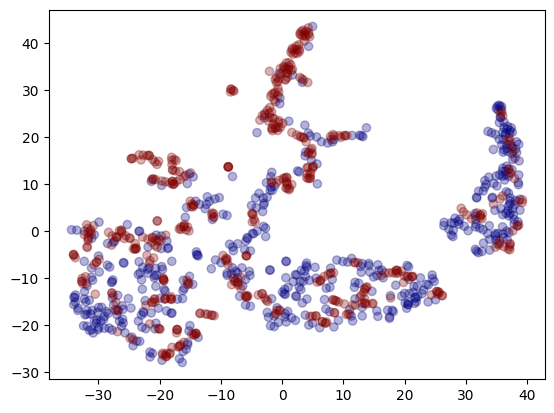

In [60]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

X = df_train[df_train.columns[:-1]]
y = df_train.Class
sm = SMOTETomek(random_state=57)
X_res, y_res = sm.fit_resample(X, y)

from sklearn.manifold import TSNE
pca = TSNE(n_components=2, random_state=0)
X_reduced_tsne = pca.fit_transform(X_res)  # wineデータをPCAで次元圧縮
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1],
            c=y_res, cmap='jet', alpha=0.3)
plt.show()

if use_SMOTE:
    X_res['Class'] = y_res
    df_train = X_res

In [61]:
df_train

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FR,FS,GB,GE,GF,GH,GI,GL,times,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,737137.0,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,737269.0,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,737269.0,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,737269.0,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,737509.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,737681.0,0
fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,737676.0,0
fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,737264.0,0


### yeo-johnson変換

In [62]:
# cols = df_train.columns[:-2]
# pt = PowerTransformer(method='yeo-johnson')
# pt.fit(df_train[cols].values)
# df_train[cols] = pt.transform(df_train[cols].values)
# df_test[cols] = pt.transform(df_test[cols].values)
# 
# df_train

## スケールを変更

In [63]:
df_train_noscale = df_train.copy()

scaler = RobustScaler().set_output(transform="pandas")
df_train.loc[:, df_train.columns[:-2]] = scaler.fit_transform(df_train[df_train.columns[:-2]])
df_train

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FR,FS,GB,GE,GF,GH,GI,GL,times,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,-0.472222,-0.005214,0.000000,0.069272,0.000000,-1.880769,0.000000,-0.134115,1.123175,-0.463451,...,0.598571,-0.333333,-0.642283,0.000000,-0.359338,-0.716263,0.641741,-0.009952,737137.0,1
007255e47698,-0.680556,-0.989494,0.000000,0.611687,0.000000,-0.607692,0.000000,0.631510,0.000000,0.265382,...,-0.624571,0.681159,-0.819132,0.000000,1.240601,-0.124567,-0.197595,0.990234,737269.0,0
013f2bd269f5,0.375000,-0.224190,0.000000,0.440180,0.000000,0.738462,0.000000,0.488281,0.000000,0.073301,...,-0.153143,2.028986,1.581994,0.290982,0.359598,-0.218622,-0.129459,-0.006447,737269.0,0
043ac50845d5,-0.333333,0.323123,1.226427,2.105694,0.000000,-0.584615,0.000000,0.122396,0.000000,-0.440533,...,-0.624571,0.072464,-0.020900,0.178349,-0.353767,0.789556,1.101632,-0.008328,737269.0,0
044fb8a146ec,0.083333,0.283109,0.000000,-0.239281,0.000000,-0.473077,2.594595,-1.459635,26.204380,0.388671,...,46.670286,-0.275362,-0.204180,1.336815,0.042256,1.248820,-0.105640,-0.011038,737509.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd3dafe738fd,-0.666667,0.004501,1.351236,-0.410097,4.882164,-0.665385,4.594595,-0.395833,0.408759,-0.446912,...,0.128000,-0.391304,-0.847267,2.628881,0.015869,-0.504561,0.627426,0.990234,737681.0,0
fd895603f071,0.263889,1.081978,0.000000,0.968303,7.834536,0.411538,0.027027,0.446615,0.661496,0.348963,...,0.109714,0.376812,1.479904,7.718779,-0.292729,-0.081158,1.865560,-0.008808,737676.0,0
fd8ef6377f76,0.236111,-0.305510,1.574611,1.295989,1.866864,1.319231,0.000000,1.022135,0.000000,0.473846,...,-0.624571,-0.391304,0.102894,1.023740,-0.083984,-0.375590,1.748697,0.990234,737264.0,0


In [64]:
df_train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,0.398141,0.176360,1.171166,0.686109,1.989554,0.223008,3.083622,0.021721,1.771618,0.187443,...,0.395963,2.367394,0.364503,0.168810,1.074996,0.421349,0.074458,0.213190,0.374303,0.175041
std,1.522442,1.062852,4.479386,2.595063,10.518877,1.107824,36.996129,0.898906,16.920572,1.606932,...,1.894317,49.440342,2.788738,0.863479,2.622407,1.191926,0.833899,0.807352,0.472412,0.380310
min,-0.888889,-1.352741,0.000000,-0.645920,0.000000,-1.880769,0.000000,-1.459635,0.000000,-1.757455,...,-0.470789,-0.624571,-0.391304,-1.267685,0.000000,-0.481947,-1.790186,-0.892929,-0.015407,0.000000
25%,-0.333333,-0.426455,0.000000,-0.307515,0.000000,-0.392308,0.000000,-0.481771,0.000000,-0.447966,...,-0.470789,-0.624571,-0.391304,-0.409164,0.000000,-0.310363,-0.471217,-0.400630,-0.009766,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.573545,1.000000,0.692485,0.000000,0.607692,1.000000,0.518229,1.000000,0.552034,...,0.529211,0.375429,0.608696,0.590836,1.000000,0.689637,0.528783,0.599370,0.990234,0.000000
max,18.875000,11.813503,63.944004,22.701706,170.804946,14.430769,913.351351,5.890625,379.728102,25.562747,...,22.246434,1224.725143,66.579710,10.111736,25.913517,8.373109,4.277760,3.343430,0.990234,1.000000


In [65]:
df_test_noscale = df_test.copy()

df_test.loc[:,df_test.columns[:-1]] = scaler.transform(df_test[df_test.columns[:-1]])
df_test

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,times
Id,,,,,,,,,,,,,,,,,,,,,
00eed32682bb,-1.152778,-1.441727,-2.985352,-0.764177,-8.138688,-2.184615,-2.27027,-2.161458,-0.319343,-2.658231,...,-0.499355,-1.114286,-0.536232,-1.622186,-1.320667,-0.48275,-2.587606,-0.912912,-0.015459,737698.0
010ebe33f668,-1.152778,-1.441727,-2.985352,-0.764177,-8.138688,-2.184615,-2.27027,-2.161458,-0.319343,-2.658231,...,-0.499355,-1.114286,-0.536232,-1.622186,-1.320667,-0.48275,-2.587606,-0.912912,-0.015459,737698.0
02fa521e1838,-1.152778,-1.441727,-2.985352,-0.764177,-8.138688,-2.184615,-2.27027,-2.161458,-0.319343,-2.658231,...,-0.499355,-1.114286,-0.536232,-1.622186,-1.320667,-0.48275,-2.587606,-0.912912,-0.015459,737698.0
040e15f562a2,-1.152778,-1.441727,-2.985352,-0.764177,-8.138688,-2.184615,-2.27027,-2.161458,-0.319343,-2.658231,...,-0.499355,-1.114286,-0.536232,-1.622186,-1.320667,-0.48275,-2.587606,-0.912912,-0.015459,737698.0
046e85c7cc7f,-1.152778,-1.441727,-2.985352,-0.764177,-8.138688,-2.184615,-2.27027,-2.161458,-0.319343,-2.658231,...,-0.499355,-1.114286,-0.536232,-1.622186,-1.320667,-0.48275,-2.587606,-0.912912,-0.015459,737698.0


In [66]:
df_train['times'] = df_train.times.astype(int)
df_test['times'] = df_test.times.astype(int)

## select columns

In [67]:
# cols_train = ['AH', 'CC', 'GI', 'BQ', 'GH', 'DE', 'BR', 'EP', 'EL', 'CL', 'CD ', 'AM', 'EU', 'FI', 'EE', 'CU', 'DU', 'GL', 'DL', 'DV',"Class"]
# cols_test = ['AH', 'CC', 'GI', 'BQ', 'GH', 'DE', 'BR', 'EP', 'EL', 'CL', 'CD ', 'AM', 'EU', 'FI', 'EE', 'CU', 'DU', 'GL', 'DL', 'DV']
# df_train = df_train[cols_train]
# df_test = df_test[cols_test]
# df_test

# PyTorch

In [68]:
class cfg :
    TRAIN_BATCHSIZE = 64
    VALID_BATCHSIZE = 200
    learning_rate = 0.0005
    num_epochs = 3000
    seed = seed
    
cfg.__dict__.items()

dict_items([('__module__', '__main__'), ('TRAIN_BATCHSIZE', 64), ('VALID_BATCHSIZE', 200), ('learning_rate', 0.0005), ('num_epochs', 3000), ('seed', 57), ('__dict__', <attribute '__dict__' of 'cfg' objects>), ('__weakref__', <attribute '__weakref__' of 'cfg' objects>), ('__doc__', None)])

In [69]:
# np.random.normal(loc=0, scale=0.1, size=56).astype(np.float32) > 0

### dataset/dataloader

In [70]:
class MyDataset(Dataset):
    def __init__(self, df, is_train=False):
        super().__init__()
        self.df = df
        self.is_train = is_train
        
        self.noise_mean = 0 
        self.noise_std = 0.01
        self.th = 0.5
        self.mask = np.array([1 if e != "EJ" else 0 for e in df_train.columns])[:-2].astype(np.float32)
        
        X = df[df.columns[:-2]]
        y = df.Class
        self.X = X
        self.y = y
#         sm = SMOTETomek(random_state=57)
#         X_res, y_res = sm.fit_resample(X, y)
#         self.X = X_res
#         self.y = y_res
        
    # ここで取り出すデータを指定している
    def __getitem__(
        self,
        index
    ) :
#         print(index, self.df.iloc[index])
      
#         data = torch.Tensor(self.df.iloc[index, :-2].to_numpy())
#         label = self.df.Class[index]
        data = torch.Tensor(self.X.iloc[index, : ].to_numpy())
        label = y_res[index]
    
        # データ拡張（0, 0.05)の正規分布ノイズを付加
        if self.is_train and random.random() < self.th:
#             m2 = np.random.normal(loc=self.noise_mean, scale=self.noise_std, size=self.mask.shape).astype(np.float32) > 0
            data += self.mask * np.random.normal(loc=self.noise_mean, scale=self.noise_std, size=self.mask.shape).astype(np.float32)        
        
        return data, label

    # この method がないと DataLoader を呼び出す際にエラーを吐かれる
    def __len__(self) -> int:
        return len(self.df)
    
dat = MyDataset(df_train, is_train=True)
dat[0]

(tensor([-0.4722, -0.0052,  0.0000,  0.0693,  0.0000, -1.8808,  0.0000, -0.1341,
          1.1232, -0.4635,  0.3333, -0.2009,  0.9814,  0.3569,  0.0000,  0.0865,
         -0.4587, -1.6082, -0.5025, -0.4000,  0.0000, -2.4523, -1.9588, -0.0841,
          0.0060,  0.8481, -0.0374,  0.0000, -0.5625, -0.6463, -0.3687,  0.4565,
          4.8193,  0.0000,  0.0799, -0.1885, -0.2781, -0.0763,  3.6883,  0.0000,
         -0.5421,  0.0000, -0.4203, -0.7452,  1.8316,  0.3070, -2.1252,  0.7041,
          0.5986, -0.3333, -0.6423,  0.0000, -0.3593, -0.7163,  0.6417, -0.0100]),
 1)

### model

In [71]:
"""
margin: 通常、2クラス分類ではmarginの値は0.2から0.5の範囲で設定されます。
    この範囲内での値の選択は、同じクラスの特徴ベクトルを近くに、異なるクラスの
    特徴ベクトルを遠くに分離する効果を持ちます。具体的な値は実験によって調整する
    必要がありますが、一般的には0.3や0.4が試されることが多いです。
scale: 2クラス分類の場合、scaleの値は一般的に10から30程度が使用されます。
    値が大きいほど、クラス分類の確信度が高まりますが、適切な値はデータセットやタスクに
    依存します。一般的な出発点としては、10や20を試してみることができます。
"""
class ArcMarginProduct(nn.Module):
    def __init__(self, in_features, out_features, s=30.0, m=0.50, easy_margin=False):
        super(ArcMarginProduct, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.s = s
        self.m = m
        self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        nn.init.xavier_uniform_(self.weight)

        self.easy_margin = easy_margin
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.th = math.cos(math.pi - m)
        self.mm = math.sin(math.pi - m) * m

    def forward(self, input, train, label=False):
        # --------------------------- cos(theta) & phi(theta) ---------------------------
        cosine = F.linear(F.normalize(input), F.normalize(self.weight))
        sine = torch.sqrt((1.0 - torch.pow(cosine, 2)).clamp(0, 1))
        phi = cosine * self.cos_m - sine * self.sin_m
        if self.easy_margin:
            phi = torch.where(cosine > 0, phi, cosine)
        else:
            phi = torch.where(cosine > self.th, phi, cosine - self.mm)
        if train:
            one_hot = torch.zeros(cosine.size())
            if device == "cpu":
                one_hot.scatter_(1, label.view(-1, 1).long(), 1)
            else:
                one_hot = torch.zeros(cosine.size(), device='cuda')
                one_hot.scatter_(1, label.cuda().view(-1, 1).long(), 1)
            output = (one_hot * phi) + ((1.0 - one_hot) * cosine)  # you can use torch.where if your torch.__version__ is 0.4
        else:
            output = cosine
        output *= self.s

        return output

In [72]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=128, last_hidden_dim=64):
        super(MyModel, self).__init__()

#         self.bn1 = nn.BatchNorm1d(input_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.bn3 = nn.BatchNorm1d(last_hidden_dim)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, last_hidden_dim)
        self.arcface = ArcMarginProduct(last_hidden_dim, output_dim, s = 10, m = 0.1)
        
        self.dropout01 = nn.Dropout(0.1)
        self.dropout05 = nn.Dropout(0.5)

    def forward(self, x, labels):
#         x = self.bn1(x)
        x = self.dropout01(x)
        x = F.mish(self.bn2(self.fc1(x)))
        x = self.dropout05(x)
        x = F.mish(self.bn3(self.fc2(x)))
        if self.training:
            logits = self.arcface(x, self.training, labels)
        else:
            logits = self.arcface(x, self.training)
        return logits, x

In [73]:
# def balanced_log_loss(y_true, y_pred):
#     y_pred = y_pred.astype('float64')
#     y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
#     nc = np.bincount(y_true)
#     w0, w1 = 1/(nc[0]/y_true.shape[0]), 1/(nc[1]/y_true.shape[0])
#     balanced_log_loss_score = (-w0/nc[0]*(np.sum(np.where(y_true==0,1,0) * np.log(1-y_pred))) - w1/nc[1]*(np.sum(np.where(y_true!=0,1,0) * np.log(y_pred)))) / (w0+w1)
#     return balanced_log_loss_score

from sklearn.metrics import log_loss
def balanced_log_loss(y_true, y_pred):
    y_pred = y_pred.astype('float64')    
    nc = np.bincount(y_true)
    return log_loss(y_true, y_pred, sample_weight = 1/nc[y_true], eps=1e-15)

In [74]:
def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
# criterion = F.cross_entropy

In [75]:
balance = torch.Tensor([len(df_train)/sum(df_train.Class == i) for i in range(len(df_train.Class.unique()))])
balance /= sum(balance)
balance

tensor([0.1750, 0.8250])

### train

In [76]:
from tqdm import tqdm

In [77]:
def train(fold, train_dataloader,valid_dataloader, input_dim, output_dim, total_epoch = None):
    best_score = 10**18
    best_epoch = -1
    model = MyModel(input_dim, output_dim).to(device)

    optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)
#     criterion = nn.CrossEntropyLoss().to(device)
    criterion = nn.CrossEntropyLoss(weight=balance).to(device)
    
    if total_epoch is None:
        total_epoch = cfg.num_epochs
    
    with tqdm(total=total_epoch) as pbar:
        for epoch in range(total_epoch):
            y_true = []
            y_pred = []    

            model.train()  # モデルを訓練モードに設定
            total_loss = 0.0
            for batch in train_dataloader:
                inputs, labels = batch
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()  # 勾配の初期化
                # フォワード処理
                outputs, _ = model(inputs, labels)      
                # 損失の計算
                loss = criterion(outputs, labels)
                # バックワード処理
                loss.backward()
                # パラメータの更新
                optimizer.step()
                total_loss += loss.detach().item()
            avg_train_loss = total_loss / len(train_dataloader)

            model.eval()  # モデルをvalidモードに設定
            total_loss = 0.0


            for batch in valid_dataloader:
                inputs, labels = batch
                inputs = inputs.to(device)
                labels = labels.to(device)
                with torch.no_grad():
                    outputs, _ = model(inputs, labels)     
                loss = criterion(outputs, labels)
                total_loss += loss.detach().item()
                y_true += (labels.detach().tolist())
                y_pred += (1 - F.softmax(outputs, dim=1)[:, 0]).detach().tolist()
            avg_valid_loss = total_loss / len(valid_dataloader)

            y_true = np.array(y_true)
            y_pred = np.array(y_pred)
            score = balanced_log_loss(y_true, y_pred)

            pbar.set_postfix(train=avg_train_loss, valid=avg_valid_loss, score=score, best_score=best_score, best_epoch=best_epoch)
            pbar.update(1)
    #         if (epoch+1)%100 == 0:
    #             tqdm.write("test")
    #             print(f"Epoch {epoch+1}/{cfg.num_epochs}, train Loss: {avg_train_loss:.4f}",
    #                   f" : valid Loss: {avg_valid_loss:.4f}, score = {score}")
            if epoch > 100 and best_score > score:
#                 print(f"Epoch {epoch+1}/{cfg.num_epochs}, train Loss: {avg_train_loss:.4f}",
#                       f" : valid Loss: {avg_valid_loss:.4f}, score = {score} Saved.", f"model_weight_fold{fold}.pth")
                last_file = f"model_weight_fold{fold}.pth"
                best_score = min(best_score, score)
                best_epoch = epoch+1
                torch.save(model.state_dict(), f"model_weight_fold{fold}.pth")

    torch.save(model.state_dict(), f"model_weight_last_fold{fold}.pth")

    return best_score

In [78]:
seed_everything(cfg.seed)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

num = 0
score = 0
is_train = True

# timesは入れない！！！！
input_dim = len(df_train.columns)-2
output_dim = len(df_train.Class.unique())

if torch_train:
    for num, (train_idx, valid_idx) in enumerate(kf.split(df_train, greeks_df.Class)):
#         if num != 4 : continue
        train_df = df_train.iloc[train_idx]
        valid_df = df_train.iloc[valid_idx]
        train_dataset = MyDataset(train_df, is_train=is_train)
        valid_dataset = MyDataset(valid_df)
        train_dataloader = DataLoader(train_dataset, batch_size=cfg.TRAIN_BATCHSIZE, shuffle=True)
        valid_dataloader = DataLoader(valid_dataset, batch_size=cfg.VALID_BATCHSIZE, shuffle=False)

        print(f"Fold{num}")
        score += train(num, train_dataloader, valid_dataloader, input_dim, output_dim)

        num+=1

    print(score/5)

Fold0
100%|██████████| 1000/1000 [04:09<00:00,  4.00it/s, best_epoch=951, best_score=0.352, score=0.618, train=0.451, valid=0.517] 
Fold1
100%|██████████| 1000/1000 [12:18<00:00,  1.35it/s, best_epoch=767, best_score=0.422, score=0.583, train=0.438, valid=0.42]   
Fold2
100%|██████████| 1000/1000 [08:43<00:00,  1.91it/s, best_epoch=442, best_score=0.461, score=0.931, train=0.445, valid=0.6]   
Fold3
100%|██████████| 1000/1000 [06:26<00:00,  2.58it/s, best_epoch=752, best_score=0.342, score=0.513, train=0.473, valid=0.385] 
Fold4
100%|██████████| 1000/1000 [05:14<00:00,  3.18it/s, best_epoch=984, best_score=0.254, score=0.318, train=0.437, valid=0.307] 
0.36624119001847333

### train/single model

In [79]:
if torch_train:
    # 全てのデータを利用して学習 train=valid
    train_dataset = MyDataset(df_train, is_train=is_train)
    valid_dataset = MyDataset(df_train)
    train_dataloader = DataLoader(train_dataset, batch_size=cfg.TRAIN_BATCHSIZE, shuffle=True)
    valid_dataloader = DataLoader(valid_dataset, batch_size=cfg.VALID_BATCHSIZE, shuffle=False)

    num = 100
    seed_everything(cfg.seed * num)

    print(f"Fold{num}")
    score = train(num, train_dataloader, valid_dataloader, input_dim, output_dim, total_epoch=1000)

    print(score)

In [80]:
if torch_train:
    # 全てのデータを利用して学習 train=valid
    train_dataset = MyDataset(df_train, is_train=is_train)
    valid_dataset = MyDataset(df_train)
    train_dataloader = DataLoader(train_dataset, batch_size=cfg.TRAIN_BATCHSIZE, shuffle=True)
    valid_dataloader = DataLoader(valid_dataset, batch_size=cfg.VALID_BATCHSIZE, shuffle=False)

    num = 101
    seed_everything(cfg.seed * num)
    print(f"Fold{num}")
    score = train(num, train_dataloader, valid_dataloader, input_dim, output_dim, total_epoch=2000)

    print(score)

### 予測用の関数等の定義

In [81]:
nn_models = []
for i in range(5):
    model = MyModel(input_dim, output_dim)
    if torch_train:
        print(f'model_weight_fold{i}.pth')
        model.load_state_dict(torch.load(f'model_weight_fold{i}.pth', map_location=torch.device('cpu')))
    else:
        print(f'../input/icr-pycaret-dataset/model_weight_fold{i}.pth')
        model.load_state_dict(torch.load(f'../input/icr-pycaret-dataset/model_weight_fold{i}.pth', map_location=torch.device('cpu')))
        
    model.to(device)
    
    model.eval()  ## torch.nn.Module.eval
    nn_models.append(model)

../input/icr-pycaret-dataset/model_weight_fold0.pth
../input/icr-pycaret-dataset/model_weight_fold1.pth
../input/icr-pycaret-dataset/model_weight_fold2.pth
../input/icr-pycaret-dataset/model_weight_fold3.pth
../input/icr-pycaret-dataset/model_weight_fold4.pth


In [82]:
nn_models2 = []
for i in range(5):
    model = MyModel(input_dim, output_dim)
    if torch_train:
        print(f'model_weight_fold{i}-2.pth')
        model.load_state_dict(torch.load(f'model_weight_fold{i}-2.pth', map_location=torch.device('cpu')))
    else:
        print(f'../input/icr-pycaret-dataset/model_weight_fold{i}-2.pth')
        model.load_state_dict(torch.load(f'../input/icr-pycaret-dataset/model_weight_fold{i}-2.pth', map_location=torch.device('cpu')))
        
    model.to(device)
    model.eval()  ## torch.nn.Module.eval
    nn_models2.append(model)

../input/icr-pycaret-dataset/model_weight_fold0-2.pth
../input/icr-pycaret-dataset/model_weight_fold1-2.pth
../input/icr-pycaret-dataset/model_weight_fold2-2.pth
../input/icr-pycaret-dataset/model_weight_fold3-2.pth
../input/icr-pycaret-dataset/model_weight_fold4-2.pth


In [83]:
nn_single_model = []
for i in range(100, 102):
    model = MyModel(input_dim, output_dim)
    if torch_train:
        print(f'model_weight_fold{i}.pth')
        model.load_state_dict(torch.load(f'model_weight_fold{i}.pth', map_location=torch.device('cpu')))
    else:
        print(f'../input/icr-pycaret-dataset/model_weight_fold{i}.pth')
        model.load_state_dict(torch.load(f'../input/icr-pycaret-dataset/model_weight_fold{i}.pth', map_location=torch.device('cpu')))
        
    model.to(device)
    model.eval()  ## torch.nn.Module.eval
    nn_single_model.append(model)

../input/icr-pycaret-dataset/model_weight_fold100.pth
../input/icr-pycaret-dataset/model_weight_fold101.pth


In [84]:
nn_single_model2 = []
for i in range(100, 102):
    model = MyModel(input_dim, output_dim)
    if torch_train:
        print(f'model_weight_fold{i}-2.pth')
        model.load_state_dict(torch.load(f'model_weight_fold{i}-2.pth', map_location=torch.device('cpu')))
    else:
        print(f'../input/icr-pycaret-dataset/model_weight_fold{i}-2.pth')
        model.load_state_dict(torch.load(f'../input/icr-pycaret-dataset/model_weight_fold{i}-2.pth', map_location=torch.device('cpu')))
        
    model.to(device)
    model.eval()  ## torch.nn.Module.eval
    nn_single_model2.append(model)

../input/icr-pycaret-dataset/model_weight_fold100-2.pth
../input/icr-pycaret-dataset/model_weight_fold101-2.pth


In [85]:
def nn_predict_proba(X, models):
    preds = []
    features = []
    X = X.to(device)
    for model in models:
        with torch.no_grad():
            pred, feature = model(X, None)
        pred = F.softmax(pred, dim=1).cpu().detach().numpy()

        if len(preds) == 0:
            preds = pred
            features = feature
        else:
            preds += pred
            features += feature

    preds = preds/len(models)
    feature /= len(models)
    return preds, feature

In [86]:
X = torch.Tensor(df_train[df_train.columns[:-2]].to_numpy())
y = df_train.Class

preds, features = nn_predict_proba(X, nn_models)
preds, features

(array([[3.8089111e-02, 9.6191090e-01],
        [9.9950773e-01, 4.9224746e-04],
        [8.9125758e-01, 1.0874239e-01],
        ...,
        [9.9776018e-01, 2.2397940e-03],
        [9.8534364e-01, 1.4656347e-02],
        [9.9723184e-01, 2.7681391e-03]], dtype=float32),
 tensor([[ 0.0571,  0.0363,  0.0070,  ..., -0.0358,  0.0234,  0.0622],
         [ 0.0075,  0.0537,  0.0257,  ..., -0.0362, -0.0006,  0.0049],
         [ 0.0284,  0.0392,  0.0142,  ..., -0.0392,  0.0060,  0.0432],
         ...,
         [ 0.0094,  0.0549,  0.0282,  ..., -0.0390,  0.0016,  0.0182],
         [ 0.0244,  0.0454,  0.0180,  ..., -0.0381,  0.0148,  0.0198],
         [ 0.0420,  0.0294, -0.0055,  ..., -0.0411,  0.0092,  0.0129]]))

In [87]:
balanced_log_loss(y, preds[:, 1])

0.1171958512181134

In [88]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

for idx, (train_idx, valid_idx) in enumerate(kf.split(df_train, greeks_df.Class)):
    valid_df = df_train.iloc[valid_idx]
    
    X = torch.Tensor(valid_df[valid_df.columns[:-2]].to_numpy()).to(device)
    y = valid_df.Class
    with torch.no_grad():
        pred, _ = nn_models[idx](X, None)
    pred = F.softmax(pred, dim=1).detach().cpu().numpy()
    score = balanced_log_loss(y, pred[:, 1])
    print(f"Fold{idx}", score)

Fold0 0.23968630513096645
Fold1 0.13940624779741514
Fold2 0.48201105283591733
Fold3 0.25245653082519326
Fold4 0.4537879877942637


In [89]:
# single model
X = torch.Tensor(df_train[df_train.columns[:-2]].to_numpy())
y = df_train.Class

preds, features = nn_predict_proba(X, nn_single_model)
balanced_log_loss(y, preds[:, 1])

0.06488931013387277

# LightGBM/XGBoost/CatBoost

In [90]:
classes_weights = compute_sample_weight(
    class_weight='balanced',
    y=df_train.Class
)
len(classes_weights)

617

In [91]:
classes_weights[classes_weights == max(classes_weights)]*=positive_weight
classes_weights[:10]

array([5.71296296, 0.60609037, 0.60609037, 0.60609037, 5.71296296,
       0.60609037, 0.60609037, 0.60609037, 0.60609037, 0.60609037])

In [92]:
classes_weights2 = compute_sample_weight(
    class_weight='balanced',
    y=df_train.Class
)
classes_weights2[classes_weights2 == max(classes_weights2)]*=positive_weight2
classes_weights2[:10]

array([5.71296296, 0.60609037, 0.60609037, 0.60609037, 5.71296296,
       0.60609037, 0.60609037, 0.60609037, 0.60609037, 0.60609037])

In [93]:
def balanced_log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
    nc = np.bincount(y_true)
    w0, w1 = 1/(nc[0]/y_true.shape[0]), 1/(nc[1]/y_true.shape[0])
    balanced_log_loss_score = (-w0/nc[0]*(np.sum(np.where(y_true==0,1,0) * np.log(1-y_pred))) - w1/nc[1]*(np.sum(np.where(y_true!=0,1,0) * np.log(y_pred)))) / (w0+w1)
    return balanced_log_loss_score

from sklearn.metrics import log_loss
def balanced_log_loss(y_true, y_pred):
    nc = np.bincount(y_true)
    return log_loss(y_true, y_pred, sample_weight = 1/nc[y_true], eps=1e-15)

# 独自の評価関数をスコアリング関数に変換
balanced_log_loss_scorer = make_scorer(balanced_log_loss, greater_is_better=False)

## optuna

In [94]:
# 初期設定値
# lgbm_params = {'n_estimators': 880,
#  'reg_alpha': 1.1,
#  'reg_lambda': 57.800000000000004,
#  'num_leaves': 7,
#  'min_child_samples': 54,
#  'colsample_bytree': 0.8,
#  'subsample': 0.5,
#  'subsample_freq': 2}

# lgbm_params = {'n_estimators': 1130,
#  'reg_alpha': 0.0,
#  'reg_lambda': 86.60000000000001,
#  'num_leaves': 28,
#  'min_child_samples': 26,
#  'colsample_bytree': 0.8,
#  'subsample': 0.6,
#  'subsample_freq': 1}

lgbm_params = {'n_estimators': 1480,
 'reg_alpha': 0.1,
 'reg_lambda': 9.600000000000001,
 'num_leaves': 48,
 'min_child_samples': 11,
 'colsample_bytree': 0.7,
 'subsample': 0.8,
 'subsample_freq': 1}

# lgbm_params_2 = {'n_estimators': 620,
#  'reg_alpha': 0.1,
#  'reg_lambda': 55.2,
#  'num_leaves': 46,
#  'min_child_samples': 40,
#  'colsample_bytree': 1.0,
#  'subsample': 0.5,
#  'subsample_freq': 1}
    
# lgbm_params_2 = {'n_estimators': 850,
#  'reg_alpha': 1.7000000000000002,
#  'reg_lambda': 11.200000000000001,
#  'num_leaves': 4,
#  'min_child_samples': 23,
#  'colsample_bytree': 0.6,
#  'subsample': 0.9,
#  'subsample_freq': 2}

lgbm_params_2 = {'n_estimators': 1260,
 'reg_alpha': 0.0,
 'reg_lambda': 5.0,
 'num_leaves': 45,
 'min_child_samples': 21,
 'colsample_bytree': 0.9,
 'subsample': 0.9,
 'subsample_freq': 2}
    
# xgb_params = {'n_estimators': 700,
#  'max_depth': 3,
#  'learning_rate': 0.03560016067885742,
#  'subsample': 0.7408505704121144,
#  'colsample_bytree': 0.5705779083310649,
#  'gamma': 0.5286651204230014}
# xgb_params = {'n_estimators': 1000,
#  'max_depth': 3,
#  'learning_rate': 0.1543150953351635,
#  'subsample': 0.528008233404971,
#  'colsample_bytree': 0.9851329877303666,
#  'reg_alpha': 3.8000000000000003,
#  'reg_lambda': 39.7,
#  'gamma': 0.017381355558751747}

# xgb_params = {'n_estimators': 500,
#  'max_depth': 3,
#  'learning_rate': 0.10793305053505592,
#  'subsample': 0.8369256864343991,
#  'colsample_bytree': 0.7520464672724583,
#  'reg_alpha': 0.0,
#  'reg_lambda': 37.0,
#  'gamma': 0.015813647736160532}

xgb_params = {'n_estimators': 1100,
 'max_depth': 10,
 'learning_rate': 0.15614514347924224,
 'subsample': 0.5914988686475774,
 'colsample_bytree': 0.6908905550987483,
 'reg_alpha': 0.0,
 'reg_lambda': 25.8,
 'gamma': 0.01968681003733401}

# xgb_params_2 = {'n_estimators': 1100,
#  'max_depth': 3,
#  'learning_rate': 0.14518639775016545,
#  'subsample': 0.5084553487981508,
#  'colsample_bytree': 0.8331982072851236,
#  'reg_alpha': 2.6,
#  'reg_lambda': 44.800000000000004,
#  'gamma': 0.0011795489621245533}
   
    
# xgb_params_2 = {'n_estimators': 400,
#  'max_depth': 3,
#  'learning_rate': 0.29902645074397594,
#  'subsample': 0.7735383359613076,
#  'colsample_bytree': 0.7336849557739112,
#  'reg_alpha': 0.0,
#  'reg_lambda': 49.0,
#  'gamma': 0.008816865972010722}

xgb_params_2 = {'n_estimators': 1400,
 'max_depth': 6,
 'learning_rate': 0.11874831982593327,
 'subsample': 0.6511990698691976,
 'colsample_bytree': 0.6701953578639556,
 'reg_alpha': 0.0,
 'reg_lambda': 29.6,
 'gamma': 0.0011405697665625514}
    
# cb_params = {'iterations': 95,
#  'depth': 4,
#  'learning_rate': 0.10210645995422828,
#  'random_strength': 3,
#  'bagging_temperature': 0.034248653596267484,
#  'od_wait': 50}

cb_params = {'iterations': 289,
 'depth': 4,
 'learning_rate': 0.18768446152569845,
 'random_strength': 10,
 'bagging_temperature': 20.487227440664658,
 'od_wait': 22}

# cb_params_2 = {'iterations': 182,
#  'depth': 4,
#  'learning_rate': 0.094658662671199,
#  'random_strength': 81,
#  'bagging_temperature': 0.02984516823532346,
#  'od_wait': 33}

cb_params_2 = {'iterations': 250,
 'depth': 4,
 'learning_rate': 0.1406204176910051,
 'random_strength': 69,
 'bagging_temperature': 0.02944175723888104,
 'od_wait': 40}

# rf_params = {'criterion': 'entropy',
#  'bootstrap': False,
#  'max_depth': 208,
#  'max_features': 'sqrt',
#  'max_leaf_nodes': 12,
#  'n_estimators': 204,
#  'min_samples_split': 4,
#  'min_samples_leaf': 8}

rf_params= {'criterion': 'entropy',
 'bootstrap': False,
 'max_depth': 745,
 'max_features': 'sqrt',
 'max_leaf_nodes': 153,
 'n_estimators': 169,
 'min_samples_split': 4,
 'min_samples_leaf': 7}

# スタッキング用
lgbm_params2 = {'n_estimators': 370,
 'reg_alpha': 21.3,
 'reg_lambda': 0.5,
 'num_leaves': 12,
 'min_child_samples': 25,
 'colsample_bytree': 0.5,
 'subsample': 0.6,
 'subsample_freq': 0}

### lightGBM

In [95]:

def obj_lgbm(trial):
    params = {
        'boosting_type':'gbdt',
        'class_weight':'balanced',
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000, step=10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 100, step=0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 100, step=0.1),
        'num_leaves': trial.suggest_int('num_leaves', 2, 64, step=1),
        'min_child_samples': trial.suggest_int('min_child_samples', 8, 64, step=1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1),
        'subsample_freq': trial.suggest_int('subsample_freq', 0, 3, step=1),
    }
    
    
    model = LGBMClassifier(**params)
    
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    score = 0
    for train_idx, valid_idx in kf.split(df_train, greeks_df.Class):
        train_df = df_train.iloc[train_idx]
        valid_df = df_train.iloc[valid_idx]
        X_train, y_train = train_df[train_df.columns[:-1]], train_df.Class
        X_valid, y_valid = valid_df[valid_df.columns[:-1]], valid_df.Class

        weights = classes_weights[train_idx]
        model.fit(X_train, y_train, sample_weight=weights, 
#                   eval_set=(X_valid, y_valid), eval_metric=lgb_metric,
#                   callbacks=[
#                       lightgbm.early_stopping(stopping_rounds=50, verbose=False),
#                       lightgbm.log_evaluation(-1),],
                 )
        y_pred = model.predict_proba(X_valid)
        if use_new_pred:
            y_pred = calc_new_pred(y_pred)

        loss = balanced_log_loss(y_valid, y_pred[:, 1])
        score += loss

    return score/5

In [96]:
# def obj_lgbm(trial):
#     params = {
#         'random_state': trial.suggest_int('random_state', 1, 100, step=1),
#         'n' : trial.suggest_int('n', 1, len(df_train.columns)-1, step=1),
#         'axis': 1
#     }
    
    
#     model = LGBMClassifier(**lgbm_params)
    
#     kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

#     score = 0
#     df_sel = df_train[df_train.columns[:-1]].sample(**params)
#     df_sel['Class'] = df_train.Class
        
#     for train_idx, valid_idx in kf.split(df_sel, greeks_df.Class):
#         train_df = df_sel.iloc[train_idx]
#         valid_df = df_sel.iloc[valid_idx]
#         X_train, y_train = train_df[train_df.columns[:-1]], train_df.Class
#         X_valid, y_valid = valid_df[valid_df.columns[:-1]], valid_df.Class
        
#         weights = classes_weights[train_idx]
#         model.fit(X_train, y_train, sample_weight=weights, 
# #                   eval_set=(X_valid, y_valid), eval_metric=lgb_metric,
# #                   callbacks=[
# #                       lightgbm.early_stopping(stopping_rounds=50, verbose=False),
# #                       lightgbm.log_evaluation(-1),],
#                  )
#         y_pred = model.predict_proba(X_valid)
#         if use_new_pred:
#             y_pred = calc_new_pred(y_pred)

#         loss = balanced_log_loss(y_valid, y_pred[:, 1])
#         score += loss

#     return score/5

In [97]:
# do_opt = False
if do_opt :
    print("----")
    study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=seed))#direction='minimize')
    study.enqueue_trial(lgbm_params)
    study.optimize(obj_lgbm, n_trials=200)
    lgbm_params = dict(study.best_trial.params.items())
lgbm_params

{'n_estimators': 1480,
 'reg_alpha': 0.1,
 'reg_lambda': 9.600000000000001,
 'num_leaves': 48,
 'min_child_samples': 11,
 'colsample_bytree': 0.7,
 'subsample': 0.8,
 'subsample_freq': 1}

In [98]:
if do_opt :
    study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=seed+1))#direction='minimize')
    study.enqueue_trial(lgbm_params2)
    study.optimize(obj_lgbm, n_trials=200)
    lgbm_params_2 = dict(study.best_trial.params.items())
lgbm_params_2

{'n_estimators': 1260,
 'reg_alpha': 0.0,
 'reg_lambda': 5.0,
 'num_leaves': 45,
 'min_child_samples': 21,
 'colsample_bytree': 0.9,
 'subsample': 0.9,
 'subsample_freq': 2}

In [99]:
params = {
    'random_state': 17,
    'n' : 49,
    'axis': 1
}   
df_sel = df_train[df_train.columns[:-1]].sample(**params)
lgb_selected = df_sel.columns
lgb_selected
lgb_selected = ['DH', 'CC', 'EH', 'BD ', 'CW ', 'FI', 'FC', 'times', 'AB', 'GB', 'DE',
       'DA', 'EU', 'EB', 'CU', 'BZ', 'GI', 'BP', 'CR', 'BC', 'DV', 'CF', 'CH',
       'EL', 'BR', 'GL', 'BQ', 'AH', 'GE', 'EG', 'AX', 'DI', 'DU', 'EP', 'DL',
       'EE', 'DF', 'GH', 'AM', 'DY', 'BN', 'CD ', 'AF', 'AZ', 'FD ', 'CL',
       'EJ', 'AR', 'DN']

In [100]:
# # ['AR', 'CL', 'CS', 'DV', 'EP']
# # ['BC', 'BD ', 'BZ']
# # ['DU', 'EH', 'FD ']
# lgb_selected = ['DH', 'CC', 'CW ', 'FI', 'FC', 'times', 'AB', 'GB', 'DE',
#        'DA', 'EU', 'EB', 'CU', 'GI', 'BP', 'CR', 'BC', 'CF', 'CH',
#        'EL', 'BR', 'GL', 'BQ', 'AH', 'GE', 'EG', 'AX', 'DI', 'DU', 'DL',
#        'EE', 'DF', 'GH', 'AM', 'DY', 'BN', 'CD ', 'AF', 'AZ', 
#        'EJ', 'AR', 'DN']

### xgboost

In [101]:
def obj_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 100, step=0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 100, step=0.1),
        'gamma': trial.suggest_float('gamma', 0.001, 1.0, log=True),
        'objective': 'binary:logistic', 
        'eval_metric': 'logloss', 
        'seed': 42
    }

    model = XGBClassifier(**params)
    
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    score = 0
    for train_idx, valid_idx in kf.split(df_train, greeks_df.Class):
        train_df = df_train.iloc[train_idx]
        valid_df = df_train.iloc[valid_idx]
        X_train, y_train = train_df[train_df.columns[:-1]], train_df.Class
        X_valid, y_valid = valid_df[valid_df.columns[:-1]], valid_df.Class

        weights = classes_weights[train_idx]
        model.fit(X_train, y_train, sample_weight=weights)
        y_pred = model.predict_proba(X_valid)
        if use_new_pred:
            y_pred = calc_new_pred(y_pred)

        loss = balanced_log_loss(y_valid, y_pred[:, 1])
        score += loss

    return score/5
    

# if do_opt :    
#     study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=seed))#direction='minimize')
# #     study.enqueue_trial(xgb_params)
#     study.optimize(obj_xgb, n_trials=200)

In [102]:
# 0.16646757594509132
if do_opt :
    study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=seed))#direction='minimize')
    study.optimize(obj_xgb, n_trials=200)
    xgb_params = dict(study.best_trial.params.items())
xgb_params

{'n_estimators': 1100,
 'max_depth': 10,
 'learning_rate': 0.15614514347924224,
 'subsample': 0.5914988686475774,
 'colsample_bytree': 0.6908905550987483,
 'reg_alpha': 0.0,
 'reg_lambda': 25.8,
 'gamma': 0.01968681003733401}

In [103]:
if do_opt :
    study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=seed+1))#direction='minimize')
    study.optimize(obj_xgb, n_trials=200)
    xgb_params_2 = dict(study.best_trial.params.items())
xgb_params_2

{'n_estimators': 1400,
 'max_depth': 6,
 'learning_rate': 0.11874831982593327,
 'subsample': 0.6511990698691976,
 'colsample_bytree': 0.6701953578639556,
 'reg_alpha': 0.0,
 'reg_lambda': 29.6,
 'gamma': 0.0011405697665625514}

### catboost

In [104]:
def obj_cb(trial):
    params = {
        'iterations' : trial.suggest_int('iterations', 50, 300),                         
        'depth' : trial.suggest_int('depth', 4, 10),                                       
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.2, log=True),               
        'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
        'bagging_temperature' :trial.suggest_float('bagging_temperature', 0.01, 100.00, log=True), 
#         'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait' :trial.suggest_int('od_wait', 10, 50)
    }

    
    if use_GPU:
        model = CatBoostClassifier(**cb_params, task_type="GPU",
                                   use_best_model=True)
    else:
        model = CatBoostClassifier(**params,
                                  use_best_model=True)
    
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    score = 0
    for train_idx, valid_idx in kf.split(df_train, greeks_df.Class):
        train_df = df_train.iloc[train_idx]
        valid_df = df_train.iloc[valid_idx]
        X_train, y_train = train_df[train_df.columns[:-1]], train_df.Class
        X_valid, y_valid = valid_df[valid_df.columns[:-1]], valid_df.Class

        weights = classes_weights[train_idx]
        model.fit(X_train, y_train, logging_level="Silent", sample_weight=weights,
                 eval_set=(X_valid, y_valid))
        y_pred = model.predict_proba(X_valid)
        if use_new_pred:
            y_pred = calc_new_pred(y_pred)

        loss = balanced_log_loss(y_valid, y_pred[:, 1])
        score += loss

    return score/5

# if do_opt :
#     study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=seed))#direction='minimize')
# #     study.enqueue_trial(cb_params)
#     study.optimize(obj_cb, n_trials=100)

In [105]:
# # 0.3161876744027021
# if do_opt :
#     cb_params = dict(study.best_trial.params.items())
# cb_params

In [106]:
if do_opt :
    study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=seed))#direction='minimize')
    study.optimize(obj_cb, n_trials=100)
    cb_params = dict(study.best_trial.params.items())
cb_params

{'iterations': 289,
 'depth': 4,
 'learning_rate': 0.18768446152569845,
 'random_strength': 10,
 'bagging_temperature': 20.487227440664658,
 'od_wait': 22}

In [107]:
if do_opt :
    study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=seed+1))#direction='minimize')
    study.optimize(obj_cb, n_trials=100)
    cb_params_2 = dict(study.best_trial.params.items())
cb_params_2

{'iterations': 250,
 'depth': 4,
 'learning_rate': 0.1406204176910051,
 'random_strength': 69,
 'bagging_temperature': 0.02944175723888104,
 'od_wait': 40}

### random forest

In [108]:
def obj_rf(trial):
    params = {
        'criterion' :trial.suggest_categorical('criterion', ['gini', 'log_loss', 'entropy']),
        'bootstrap' : trial.suggest_categorical('bootstrap',[True, False]),
        'max_depth' : trial.suggest_int('max_depth', 1, 1000),
        'max_features' : trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'max_leaf_nodes' : trial.suggest_int('max_leaf_nodes', 2, 300),
        'n_estimators' :  trial.suggest_int('n_estimators', 5, 300),
        'min_samples_split' : trial.suggest_int('min_samples_split',2,5),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf',1,10) ,      
    }
    
    
    model = RandomForestClassifier(**params)
    
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    score = 0
    for train_idx, valid_idx in kf.split(df_train, greeks_df.Class):
        train_df = df_train.iloc[train_idx]
        valid_df = df_train.iloc[valid_idx]
        X_train, y_train = train_df[train_df.columns[:-1]], train_df.Class
        X_valid, y_valid = valid_df[valid_df.columns[:-1]], valid_df.Class

        weights = classes_weights[train_idx]
        model.fit(X_train, y_train, sample_weight=weights)
        y_pred = model.predict_proba(X_valid)
        loss = balanced_log_loss(y_valid, y_pred[:, 1])
        score += loss

    return score/5
        
if do_opt :    
    study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=seed))#direction='minimize')
    study.enqueue_trial(rf_params)
    study.optimize(obj_rf, n_trials=200)

In [109]:
if do_opt :
    rf_params = dict(study.best_trial.params.items())
rf_params

{'criterion': 'entropy',
 'bootstrap': False,
 'max_depth': 745,
 'max_features': 'sqrt',
 'max_leaf_nodes': 153,
 'n_estimators': 169,
 'min_samples_split': 4,
 'min_samples_leaf': 7}

In [110]:
"""
lgbm_params = {'n_estimators': 600,
 'reg_alpha': 2.8000000000000003,
 'reg_lambda': 12.4,
 'num_leaves': 41}
 
xgb_params = {'n_estimators': 800,
 'max_depth': 4,
 'learning_rate': 0.07321832691960338,
 'subsample': 0.7576690053727902,
 'colsample_bytree': 0.7481165187056286,
 'gamma': 0.4338012239235796}
 
cb_params = {'iterations': 114,
 'depth': 4,
 'learning_rate': 0.08433020501242801,
 'random_strength': 1,
 'bagging_temperature': 0.1111714827952525,
 'od_wait': 23}
"""

"\nlgbm_params = {'n_estimators': 600,\n 'reg_alpha': 2.8000000000000003,\n 'reg_lambda': 12.4,\n 'num_leaves': 41}\n \nxgb_params = {'n_estimators': 800,\n 'max_depth': 4,\n 'learning_rate': 0.07321832691960338,\n 'subsample': 0.7576690053727902,\n 'colsample_bytree': 0.7481165187056286,\n 'gamma': 0.4338012239235796}\n \ncb_params = {'iterations': 114,\n 'depth': 4,\n 'learning_rate': 0.08433020501242801,\n 'random_strength': 1,\n 'bagging_temperature': 0.1111714827952525,\n 'od_wait': 23}\n"

In [111]:
# lgb = LGBMClassifier(boosting_type='gbdt', class_weight='balanced', colsample_bytree=1.0,
#                 importance_type='split', learning_rate=0.1, max_depth=-1,
#                 min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#                 n_estimators=100, n_jobs=-1, num_leaves=31, objective="binary",
#                 random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
#                 subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
# xgb = XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
#                colsample_bylevel=None, colsample_bynode=None,
#                colsample_bytree=None, early_stopping_rounds=None,
#                enable_categorical=False, eval_metric=None, feature_types=None,
#                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
#                interaction_constraints=None, learning_rate=None, max_bin=None,
#                max_cat_threshold=None, max_cat_to_onehot=None,
#                max_delta_step=None, max_depth=None, max_leaves=None,
#                min_child_weight=None, monotone_constraints=None,
#                n_estimators=100, n_jobs=-1, num_parallel_tree=None,
#                objective='binary:logistic', predictor=None)

# cb = CatBoostClassifier()
# tab = TabPFNClassifier(N_ensemble_configurations=64)

In [112]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [113]:
lgb = LGBMClassifier(boosting_type='gbdt', class_weight='balanced', **lgbm_params)
lgb2 = LGBMClassifier(boosting_type='gbdt', class_weight='balanced', **lgbm_params_2)

xgb = XGBClassifier(
    objective = 'binary:logistic', 
    eval_metric = 'logloss', 
    **xgb_params,
)

xgb2 = XGBClassifier(
    objective = 'binary:logistic', 
    eval_metric = 'logloss', 
    **xgb_params_2,
)


rf = RandomForestClassifier(**rf_params)
# rf = AdaBoostClassifier()

if use_GPU:
    cb = CatBoostClassifier(**cb_params, task_type="GPU")
    cb2 = CatBoostClassifier(**cb_params_2, task_type="GPU")

    tab = TabPFNClassifier(N_ensemble_configurations=64, device='cuda:0')
    tab2 = TabPFNClassifier(N_ensemble_configurations=32, device='cuda:0')
else:
    cb = CatBoostClassifier(**cb_params)
    cb2 = CatBoostClassifier(**cb_params_2)

    tab = TabPFNClassifier(N_ensemble_configurations=32)
    tab2 = TabPFNClassifier(N_ensemble_configurations=32)

# knn = KNeighborsClassifier(n_neighbors=64, metric='euclidean')
knn = KNeighborsClassifier(n_neighbors=109, metric='cosine')
knn2 = KNeighborsClassifier(n_neighbors=109, metric='cosine')

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [114]:
# def obj_knn(trial):
#     params = {
#         'size' : trial.suggest_int('size', 8, 400),
#     }
    

#     kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
# #     kf = MultilabelStratifiedKFold(n_splits=5 , shuffle=True, random_state=seed)
#     score = 0
    
#     knn = KNeighborsClassifier(n_neighbors=params['size'], metric='cosine')

    
#     for idx, (train_idx, valid_idx) in enumerate(kf.split(df_train, greeks_df.Class)):
#         train_df = df_train.iloc[train_idx]
#         valid_df = df_train.iloc[valid_idx]
#         X_train, y_train = train_df[train_df.columns[:-1]], train_df.Class
#         X_valid, y_valid = valid_df[valid_df.columns[:-1]], valid_df.Class

#         weights = classes_weights[train_idx]
#         weights2 = classes_weights2[train_idx]


#         X = torch.Tensor(train_df[valid_df.columns[:-2]].to_numpy()).to(device)
#         with torch.no_grad():
#             _, features_train = nn_models[idx](X, None)

#         X = torch.Tensor(valid_df[valid_df.columns[:-2]].to_numpy()).to(device)
#         with torch.no_grad():
#             y_nn, features_valid = nn_models[idx](X, None)
#         y_nn = F.softmax(y_nn, dim=1).cpu().detach().numpy()   

#         features_train = features_train.detach().cpu().numpy()
#         features_valid = features_valid.detach().cpu().numpy()
#         X_train2 = features_train #np.hstack([X_train.to_numpy(), features_train])
#         X_valid2 = features_valid #np.hstack([X_valid.to_numpy(), features_valid])
#         knn.fit(X_train2, y_train)
#         y_xxx = knn.predict_proba(X_valid2)
#         y_xxx = calc_new_pred(y_xxx)
        
        
#         e_loss = balanced_log_loss(y_valid, y_xxx[:, 1])
    
#         score += e_loss 

#     return score/5
    
    
# study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=seed))#direction='minimize')
# study.optimize(obj_knn, n_trials=100)
# study.best_trial.params.items()

## calc cv (5 fold)

In [115]:
a = [0.2, 1.8, 1.9, 1.3, 0.2, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.0, 0.0]
a = [1.81, 1.79, 1.42, 0.92, 0.28, 0.13, 0.0, 0.07, 0.23, 0.25, 0.04, 0.07, 0.04]
a = [1.95, 1.91, 1.85, 1.36, 0.18, 0.25, 0.06, 0.09, 0.03, 0.0, 1.4, 0.06, 0.03]

xxx_alpha, xxx_th0, xxx_th1 =  6.0, 0.66, 0.96

def check_best(score, model, cur_best) :
    best_score, best_model = cur_best[0], cur_best[1]
    if best_score > score :
        best_model = model
        best_score = score
    return [best_score, best_model]

inf = 10**10

best_model = {
    'lgb': [inf, None],
    'lgb2': [inf, None],
    'xgb' : [inf, None],
    'xgb2' : [inf, None],
    'cb' : [inf, None],
    'cb2' : [inf, None],
    'rf' : [inf, None],
    'knn' :[inf, None],
    'knn2' :[inf, None],
    'tab' : [inf, None],    
    'tab2' : [inf, None],    
}

if check_CV:
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
#     kf = MultilabelStratifiedKFold(n_splits=5 , shuffle=True, random_state=seed)
    score = 0
    
    
    y_preds = []
    y_true = []
    y_len = []
    
    y_results = [[] for _ in range(5)]
    y_valids = []
    
    for idx, (train_idx, valid_idx) in enumerate(kf.split(df_train, greeks_df.Class)):
        train_df = df_train.iloc[train_idx]
        valid_df = df_train.iloc[valid_idx]
        X_train, y_train = train_df[train_df.columns[:-1]], train_df.Class
        X_valid, y_valid = valid_df[valid_df.columns[:-1]], valid_df.Class

    #     # SMOTETomek
    #     if use_SMOTE:
    #         sm = SMOTETomek(random_state=57)
    #         X_train, y_train = sm.fit_resample(X_train, y_train)
    #         weights = compute_sample_weight(class_weight='balanced',y=y_train)                              
    #     else:
        weights = classes_weights[train_idx]
        weights2 = classes_weights2[train_idx]


        print("lgbm..")
        lgb.fit(X_train[lgb_selected], y_train, sample_weight=weights)
        y_lgb = lgb.predict_proba(X_valid[lgb_selected])
        print("lgbm2..")
        lgb2.fit(X_train, y_train, sample_weight=weights2)
        y_lgb2 = lgb2.predict_proba(X_valid)
        
        print("xgboost..")    
        xgb.fit(X_train[lgb_selected], y_train, sample_weight=weights)
        y_xgb = xgb.predict_proba(X_valid[lgb_selected])
        print("xgboost2..")    
        xgb2.fit(X_train, y_train, sample_weight=weights2)
        y_xgb2 = xgb2.predict_proba(X_valid)
        
        
        print("catboost..")
        cb.fit(X_train[lgb_selected], y_train, logging_level="Silent", sample_weight=weights)
        y_cb = cb.predict_proba(X_valid[lgb_selected])
        print("catboost2..")
        cb2.fit(X_train, y_train, logging_level="Silent", sample_weight=weights2)
        y_cb2 = cb2.predict_proba(X_valid)
        
        
        
        print("random forest..")
        rf.fit(X_train, y_train, sample_weight=weights)
        y_rf = rf.predict_proba(X_valid)
        

        print("nn...")
        X = torch.Tensor(train_df[valid_df.columns[:-2]].to_numpy()).to(device)
        with torch.no_grad():
            _, features_train = nn_models[idx](X, None)

        X = torch.Tensor(valid_df[valid_df.columns[:-2]].to_numpy()).to(device)
        with torch.no_grad():
            y_nn, features_valid = nn_models[idx](X, None)
        y_nn = F.softmax(y_nn, dim=1).cpu().detach().numpy()   

        print("xxx..")
        features_train = features_train.detach().cpu().numpy()
        features_valid = features_valid.detach().cpu().numpy()
        X_train2 = features_train #np.hstack([X_train.to_numpy(), features_train])
        X_valid2 = features_valid #np.hstack([X_valid.to_numpy(), features_valid])
        knn.fit(X_train2, y_train)
        y_xxx = knn.predict_proba(X_valid2)
        y_xxx = calc_new_pred(y_xxx)

        
#         print("xxx2..")
#         knn2.fit(X_train2, y_train)#, sample_weight=weights)
#         y_xxx2 = knn2.predict_proba(X_valid2)
#         y_xxx2 = calc_new_pred(y_xxx2)

        print("nn2...")
        X = torch.Tensor(train_df[valid_df.columns[:-2]].to_numpy()).to(device)
        with torch.no_grad():
            _, features_train = nn_models2[idx](X, None)

        X = torch.Tensor(valid_df[valid_df.columns[:-2]].to_numpy()).to(device)
        with torch.no_grad():
            y_nn2, features_valid = nn_models2[idx](X, None)
        y_nn2 = F.softmax(y_nn2, dim=1).cpu().detach().numpy()    
        
        print("xxx2..")
        features_train = features_train.detach().cpu().numpy()
        features_valid = features_valid.detach().cpu().numpy()
        X_train2 = features_train #np.hstack([X_train.to_numpy(), features_train])
        X_valid2 = features_valid #np.hstack([X_valid.to_numpy(), features_valid])
        knn2.fit(X_train2, y_train)#, sample_weight=weights)
        y_xxx2 = knn2.predict_proba(X_valid2)
        y_xxx2 = calc_new_pred(y_xxx2)
        
        # ------ noscale data
        train_df = df_train_noscale.iloc[train_idx]
        valid_df = df_train_noscale.iloc[valid_idx]
        X_train, y_train = train_df[train_df.columns[:-1]], train_df.Class
        X_valid, y_valid = valid_df[valid_df.columns[:-1]], valid_df.Class
        print("TabPFN..")
        tab.fit(X_train[lgb_selected], y_train)
        y_tab = tab.predict_proba(X_valid[lgb_selected])
        y_tab = calc_new_pred(y_tab)
        print("TabPFN2..")
        tab2.fit(X_train, y_train)
        y_tab2 = tab2.predict_proba(X_valid)
        y_tab2 = calc_new_pred(y_tab2)
        
        lgb_loss = balanced_log_loss(y_valid, y_lgb[:, 1])
        lgb2_loss = balanced_log_loss(y_valid, y_lgb2[:, 1])
        
        xgb_loss = balanced_log_loss(y_valid, y_xgb[:, 1])
        xgb2_loss = balanced_log_loss(y_valid, y_xgb2[:, 1])

        cb_loss = balanced_log_loss(y_valid, y_cb[:, 1])
        cb2_loss = balanced_log_loss(y_valid, y_cb2[:, 1])
        
    
        rf_loss = balanced_log_loss(y_valid, y_rf[:, 1])
        nn_loss = balanced_log_loss(y_valid, y_nn[:, 1])
        nn2_loss = balanced_log_loss(y_valid, y_nn2[:, 1])

        xxx_loss = balanced_log_loss(y_valid, y_xxx[:, 1])
        xxx2_loss = balanced_log_loss(y_valid, y_xxx2[:, 1])

        tab_loss = balanced_log_loss(y_valid, y_tab[:, 1])
        tab2_loss = balanced_log_loss(y_valid, y_tab2[:, 1])
        
        #-------------------------------------------
        best_model['lgb'] = check_best(lgb_loss, lgb, best_model['lgb']) 
        best_model['lgb2'] = check_best(lgb2_loss, lgb2, best_model['lgb2'])

        best_model['xgb'] = check_best(xgb_loss, xgb, best_model['xgb'])
        best_model['xgb2'] = check_best(xgb2_loss, xgb2, best_model['xgb2']) 

        best_model['cb'] = check_best(cb_loss, cb, best_model['cb']) 
        best_model['cb2'] = check_best(cb2_loss, cb2, best_model['cb2']) 

        best_model['rf'] = check_best(rf_loss, rf, best_model['rf']) 

        best_model['knn'] = check_best(xxx_loss, knn, best_model['knn']) 
        best_model['knn2'] = check_best(xxx2_loss, knn2, best_model['knn2']) 

        best_model['tab'] = check_best(tab_loss, tab, best_model['tab']) 
        best_model['tab2'] = check_best(tab2_loss, tab2, best_model['tab2']) 
        #-------------------------------------------


#         pred = ((y_lgb + y_xgb + y_cb)/3 + y_rf + y_nn + y_tab)/4
        #       b   r.   nn. k  tab

        y_results[idx].append(y_lgb)
        y_results[idx].append(y_lgb2)
        y_results[idx].append(y_xgb)
        y_results[idx].append(y_xgb2)
        y_results[idx].append(y_cb)
        y_results[idx].append(y_cb2)
        y_results[idx].append(y_rf)
        y_results[idx].append(y_nn)
        y_results[idx].append(y_nn2)
        y_results[idx].append(y_xxx)
        y_results[idx].append(y_xxx2)
        y_results[idx].append(y_tab)
        y_results[idx].append(y_tab2)
        y_valids.append(y_valid)
    
        pred = (
            y_lgb * a[0] + 
            y_lgb2* a[1] + 
            y_xgb * a[2] + 
            y_xgb2 * a[3] + 
            y_cb * a[4] + 
            y_cb2 * a[5] + 
            y_rf * a[6] + 
            y_nn * a[7] + 
            y_nn2 * a[8] + 
            y_xxx * a[9] + 
            y_xxx2 * a[10] +
            y_tab * a[11] +
            y_tab2 * a[12]) /sum(a)

                       
        p0 = pred[:, 0]
        p0 = sigmoid((p0-0.5)*xxx_alpha)
#         p0 = sigmoid((p0-0.5)*6.98)
        p0 = (p0 - min(p0))/(max(p0)-min(p0)+1e-15)

#         p0 = np.clip(p0, 0.0001, 0.9999)
#         p0[p0 > 0.99] = 1
#         p0[p0 < 0.01] = 0
                

        # 　全モデルが同じ選択の場合は、正解とする(y_rf除く)
        th_c0 = xxx_th0
        sel0 = (y_lgb > th_c0)&(y_lgb2 > th_c0)&(y_xgb > th_c0)&(y_xgb2 > th_c0)&(y_cb > th_c0)&(y_cb2 > th_c0)&\
                (y_nn > th_c0)&(y_xxx > th_c0)&(y_xxx > th_c0)&(y_tab > th_c0)&(y_tab > th_c0)
        th_c1 = xxx_th1
        sel1 = (y_lgb > th_c1)&(y_lgb2 > th_c1)&(y_xgb > th_c1)&(y_xgb2 > th_c1)&(y_cb > th_c1)&(y_cb2 > th_c1)&\
                (y_nn > th_c1)&(y_xxx > th_c1)&(y_xxx > th_c1)&(y_tab > th_c1)&(y_tab > th_c1)
        p0[sel0[:, 0]] = 1
        p0[sel1[:, 1]] = 0

        pred[:,1] = 1-p0
        pred[:,0] = p0            
        
        if use_new_pred:
            pred = calc_new_pred(pred)

        
        y_len.append(len(valid_df))
        if len(y_preds) == 0 :
            y_preds = np.concatenate([y_lgb, y_lgb2, y_xgb ,y_xgb2, y_cb, y_cb2, 
                                      y_rf, y_nn, y_nn2,  y_xxx, y_xxx2, y_tab, y_tab2, pred], axis=1)
            y_true = y_valid.to_numpy()
        else:
            y_preds = np.vstack([y_preds, np.concatenate([y_lgb, y_lgb2, y_xgb ,y_xgb2, y_cb, y_cb2, 
                                      y_rf, y_nn, y_nn2,  y_xxx, y_xxx2, y_tab, y_tab2, pred], axis=1)])
            y_true = np.hstack([y_true, y_valid.to_numpy()])
       
         
        e_loss = balanced_log_loss(y_valid, pred[:, 1])
        score += e_loss 
        print("lgb", lgb_loss, "lgb2", lgb2_loss,
              "xgb", xgb_loss, "xgb2", xgb2_loss, 
              "catboost", cb_loss, "catboost2", cb2_loss, 
              "rf", rf_loss,
              "nn", nn_loss, "nn2", nn2_loss, 
              "xxx", xxx_loss, "xxx2", xxx2_loss, 
              "TabPFN", tab_loss,  "TabPFN2", tab2_loss)
        print("--> ensamble", e_loss)

    print(score/5)
    
#0.1259729315189732
#0.1284580855726015

lgbm..
lgbm2..
xgboost..
xgboost2..
catboost..
catboost2..
random forest..
nn...
xxx..
nn2...
xxx2..
TabPFN..
TabPFN2..
lgb 0.17050281690721633 lgb2 0.1535024596800222 xgb 0.15750251890338945 xgb2 0.143713988459658 catboost 0.20928058007148373 catboost2 0.22629431886151213 rf 0.3176250533199889 nn 0.23968630312729433 nn2 0.22852036537318957 xxx 0.19266077691574432 xxx2 0.2680504324822319 TabPFN 0.21790737950410624 TabPFN2 0.22729486858159112
--> ensamble 0.15696087125220032
lgbm..
lgbm2..
xgboost..
xgboost2..
catboost..
catboost2..
random forest..
nn...
xxx..
nn2...
xxx2..
TabPFN..
TabPFN2..
lgb 0.13751203597993283 lgb2 0.15019513557065844 xgb 0.20907228122790283 xgb2 0.23984001143061034 catboost 0.2225526884474645 catboost2 0.2295513170260254 rf 0.3047051385761836 nn 0.13940624795623566 nn2 0.22242247961197964 xxx 0.1738178476185251 xxx2 0.17314624691553987 TabPFN 0.1668181893374958 TabPFN2 0.14095345252746164
--> ensamble 0.06625801343956021
lgbm..
lgbm2..
xgboost..
xgboost2..
catboo

In [116]:
#0.1385192201624788

In [117]:
best_model

{'lgb': [0.07210105684595217,
  LGBMClassifier(class_weight='balanced', colsample_bytree=0.7,
                 min_child_samples=11, n_estimators=1480, num_leaves=48,
                 reg_alpha=0.1, reg_lambda=9.600000000000001, subsample=0.8,
                 subsample_freq=1)],
 'lgb2': [0.06299814106907531,
  LGBMClassifier(class_weight='balanced', colsample_bytree=0.9,
                 min_child_samples=21, n_estimators=1260, num_leaves=45,
                 reg_lambda=5.0, subsample=0.9, subsample_freq=2)],
 'xgb': [0.1078328613742223,
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.6908905550987483, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=0.01968681003733401, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, lear

In [118]:
# weight x2 0.1190407658629042
# weight x3 0.11765156785760085
# weight x4 0.11633615775844705
# weight x5 0.11546517994697347
# weight x6 0.11587610229074743
# 0.12169594436591682 -> 0.11825007231068611(sel5)
# 0.14-(0.12169594436591682-0.11825007231068611)　0.12146115354690076

In [119]:
y_results[0][2].shape, y_valids[0].shape

((124, 2), (124,))

In [120]:
# def obj_alpha(trial):
#     a = [
#         trial.suggest_float('a0', 0, 2, step=0.01),
#         trial.suggest_float('a1', 0, 2, step=0.01),
#         trial.suggest_float('a2', 0, 2, step=0.01),
#         trial.suggest_float('a3', 0, 2, step=0.01),
#         trial.suggest_float('a4', 0, 2, step=0.01),
#         trial.suggest_float('a5', 0, 2, step=0.01),
#         trial.suggest_float('a6', 0, 2, step=0.01),
#         trial.suggest_float('a7', 0, 2, step=0.01),
#         trial.suggest_float('a8', 0, 2, step=0.01),
#         trial.suggest_float('a9', 0, 2, step=0.01),
#         trial.suggest_float('a10', 0, 2, step=0.01),
#         trial.suggest_float('a11', 0, 2, step=0.01),
#         trial.suggest_float('a12', 0, 2, step=0.01),
#         ]
#     alpha = trial.suggest_float('alpha', 1, 7, step=0.1)
#     th0 = trial.suggest_float('th0', 0.50, 0.99, step=0.01)
#     th1 = trial.suggest_float('th1', 0.50, 0.99, step=0.01)
    
    
#     score = 0
#     for i in range(5):
#         y_lgb, y_lgb2, y_xgb, y_xgb2, y_cb, y_cb2, y_rf, y_nn, y_nn2, y_xxx, y_xxx2, y_tab, y_tab2 = y_results[i]
#         y_valid = y_valids[i]
        
        
#         lgb_loss = balanced_log_loss(y_valid, y_lgb[:, 1])
#         lgb2_loss = balanced_log_loss(y_valid, y_lgb2[:, 1])
        
#         xgb_loss = balanced_log_loss(y_valid, y_xgb[:, 1])
#         xgb2_loss = balanced_log_loss(y_valid, y_xgb2[:, 1])

#         cb_loss = balanced_log_loss(y_valid, y_cb[:, 1])
#         cb2_loss = balanced_log_loss(y_valid, y_cb2[:, 1])
        
    
#         rf_loss = balanced_log_loss(y_valid, y_rf[:, 1])
#         nn_loss = balanced_log_loss(y_valid, y_nn[:, 1])
#         nn2_loss = balanced_log_loss(y_valid, y_nn2[:, 1])

#         xxx_loss = balanced_log_loss(y_valid, y_xxx[:, 1])
#         xxx2_loss = balanced_log_loss(y_valid, y_xxx2[:, 1])

#         tab_loss = balanced_log_loss(y_valid, y_tab[:, 1])
#         tab2_loss = balanced_log_loss(y_valid, y_tab2[:, 1])
        
#         pred = (
#             y_lgb * a[0] + 
#             y_lgb2* a[1] + 
#             y_xgb * a[2] + 
#             y_xgb2 * a[3] + 
#             y_cb * a[4] + 
#             y_cb2 * a[5] + 
#             y_rf * a[6] + 
#             y_nn * a[7] + 
#             y_nn2 * a[8] + 
#             y_xxx * a[9] + 
#             y_xxx2 * a[10] +
#             y_tab * a[11] +
#             y_tab2 * a[12]) /sum(a)

                       
#         p0 = pred[:, 0]
#         p0 = sigmoid((p0-0.5)*alpha)
# #         p0 = sigmoid((p0-0.5)*6.98)
#         p0 = (p0 - min(p0))/(max(p0)-min(p0)+1e-15)

# #         p0 = np.clip(p0, 0.0001, 0.9999)
# #         p0[p0 > 0.99] = 1
# #         p0[p0 < 0.01] = 0
                

#         # 　全モデルが同じ選択の場合は、正解とする(y_rf除く)
#         th_c0 = th0
#         sel0 = (y_lgb > th_c0)&(y_lgb2 > th_c0)&(y_xgb > th_c0)&(y_xgb2 > th_c0)&(y_cb > th_c0)&(y_cb2 > th_c0)&\
#                 (y_nn > th_c0)&(y_xxx > th_c0)&(y_xxx > th_c0)&(y_tab > th_c0)&(y_tab > th_c0)
#         th_c1 = th1
#         sel1 = (y_lgb > th_c1)&(y_lgb2 > th_c1)&(y_xgb > th_c1)&(y_xgb2 > th_c1)&(y_cb > th_c1)&(y_cb2 > th_c1)&\
#                 (y_nn > th_c1)&(y_xxx > th_c1)&(y_xxx > th_c1)&(y_tab > th_c1)&(y_tab > th_c1)
#         p0[sel0[:, 0]] = 1
#         p0[sel1[:, 1]] = 0

#         pred[:,1] = 1-p0
#         pred[:,0] = p0            
        
#         if use_new_pred:
#             pred = calc_new_pred(pred)
       
         
#         e_loss = balanced_log_loss(y_valid, pred[:, 1])
#         score += e_loss 
# #         print(a)
# #         print("lgb", lgb_loss, "lgb2", lgb2_loss,
# #               "xgb", xgb_loss, "xgb2", xgb2_loss, 
# #               "catboost", cb_loss, "catboost2", cb2_loss, 
# #               "rf", rf_loss,
# #               "nn", nn_loss, "nn2", nn2_loss, 
# #               "xxx", xxx_loss, "xxx2", xxx2_loss, 
# #               "TabPFN", tab_loss,  "TabPFN2", tab2_loss)
# #         print("--> ensamble", e_loss)       
# #         score = max(score, e_loss*5)

#     return score/5


# study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=cfg.seed))#direction='minimize')
# # study.enqueue_trial({'a0': 0.75, 'a1': 0.75, 'a2': 1.0, 'a3': 1.0, 'a4': 0, 'a5': 0, 'a6': 0, 'a7': 0, 'a8': 0, 'a9': 0, 'a10': 0.3, 'a11': 0.0, 'a12': 0.0 , 'alpha': 5.4, 'th0': 0.75, 'th1': 0.95})
# study.enqueue_trial({'a0': 0.6, 'a1': 1.3, 'a2': 1.72, 'a3': 1.46, 'a4': 0.12, 'a5': 0.48, 'a6': 0.04, 'a7': 0.05, 'a8': 0.6, 'a9': 0.13, 'a10': 0.41000000000000003, 'a11': 0.0, 'a12': 0.2, 'alpha': 5.1, 'th0': 0.67, 'th1': 0.97})
# study.enqueue_trial({'a0': 0.75, 'a1': 0.75, 'a2': 1.0, 'a3': 1.0, 'a4': 0, 'a5': 0, 'a6': 0, 'a7': 0, 'a8': 0, 'a9': 0.1, 'a10': 0.3, 'a11': 0.1, 'a12': 0.1 , 'alpha': 5.4, 'th0': 0.75, 'th1': 0.95})
# study.enqueue_trial({'a0': 0.9400000000000001, 'a1': 1.54, 'a2': 1.52, 'a3': 1.74, 'a4': 0.25, 'a5': 1.5, 'a6': 0.25, 'a7': 0.56, 'a8': 0.35000000000000003, 'a9': 0.0, 'a10': 0.99, 'a11': 0.37, 'a12': 0.06, 'alpha': 5.8, 'th0': 0.66, 'th1': 0.9500000000000001})
# study.enqueue_trial({'a0': 0.9400000000000001, 'a1': 1.54, 'a2': 1.52, 'a3': 1.74, 'a4': 0.25, 'a5': 1.5, 'a6': 0.25, 'a7': 0.56, 'a8': 0.35000000000000003, 'a9': 0.0, 'a10': 0.99, 'a11': 0.37, 'a12': 0.06, 'alpha': 5.8, 'th0': 0.66, 'th1': 0.9500000000000001})
# study.enqueue_trial({'a0': 1.61, 'a1': 1.75, 'a2': 1.84, 'a3': 1.07, 'a4': 1.16, 'a5': 0.09, 'a6': 0.1, 'a7': 0.06, 'a8': 0.26, 'a9': 0.04, 'a10': 0.75, 'a11': 0.04, 'a12': 0.05, 'alpha': 5.0, 'th0': 0.74, 'th1': 0.98})
# study.enqueue_trial({'a0': 1.6500000000000001, 'a1': 1.49, 'a2': 1.96, 'a3': 1.85, 'a4': 0.61, 'a5': 0.14, 'a6': 0.44, 'a7': 0.0, 'a8': 0.08, 'a9': 0.04, 'a10': 1.1400000000000001, 'a11': 0.04, 'a12': 0.03, 'alpha': 5.6000000000000005, 'th0': 0.66, 'th1': 0.99})
# study.enqueue_trial({'a0': 1.95, 'a1': 1.9100000000000001, 'a2': 1.85, 'a3': 1.36, 'a4': 0.18, 'a5': 0.25, 'a6': 0.06, 'a7': 0.09, 'a8': 0.03, 'a9': 0.0, 'a10': 1.4000000000000001, 'a11': 0.06, 'a12': 0.03, 'alpha': 6.0, 'th0': 0.66, 'th1': 0.96})
# study.optimize(obj_alpha, n_trials=500)
# print(study.best_trial.params)
# list(study.best_trial.params.values())

# # gb 0.17050281690721633 lgb2 0.1535024596800222 xgb 0.15750251890338945 xgb2 0.143713988459658 
# # catboost 0.20928058007148373 catboost2 0.22629431886151213 rf 0.3231658739569935 
# # nn 0.23968630312729433 nn2 0.22852036537318957 xxx 0.19266077691574432 xxx2 0.2680504324822319 
# # TabPFN 0.21797924773745186 TabPFN2 0.22729486858159112
# # --> ensamble 0.1609478495445408

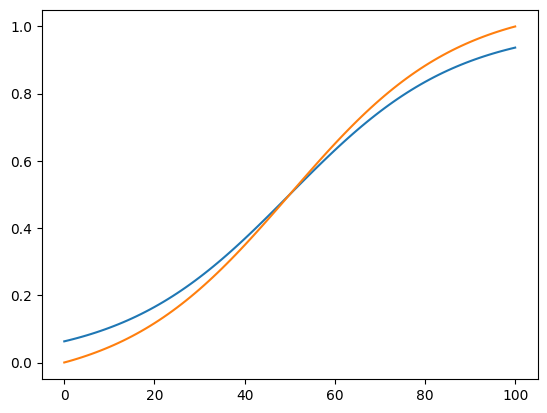

In [121]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

p0 = pred[:, 0]
p0 = np.array([i/100 for i in range(101)])
p0 = sigmoid((p0-0.5)*5.4)
plt.plot(p0)

p0 = (p0 - min(p0))/(max(p0)-min(p0))
p0 = np.clip(p0, 0.0001, 0.9999)
plt.plot(p0)

```
0.15246577482271312 -rf -knn -nn -tab (boostingのみ)
0.16141317621791187 -rf -knn -nn (boosting + tab)
0.14603296764550358 -rf -knn -tab (boosting + nn)
0.15962857016383242 -rf -nn -tab (boosting + knn)
0.19880100002949805 -rf -nn -knn -tab
0.1549086996071109 -rf
0.14709787098787236 -rf -knn
0.15552694031836586 -rf -xgb -cb
0.1676103909764996 -rf -lgb -cb


0.1486103472662918  a = 1, 0, 1.5, 0, 0.5
0.14573619761609635 a = 1, 0, 1, 0, 0.5
0.14555721433280364 a = 2, 0, 1, 0.2, 1.5
0.1446640534808395  a = 2, 0, 1, 0, 1 
0.14443877195214577 a = 2, 0, 1, 0.2, 1
0.1440592210659078  a = 2, 0, 1, 0.2, 0.8 
0.14362643242934164 a = 2, 0, 1, 0.2, 0.8 lgbm2を見直し
0.14405701359512002 ↑でKFoldの分割をgreeks.alphaにしたバージョン  !! nnがリークしている !!
0.13302360008161757 a = [2.1, 0.0, 4.0, 0.0, 0.0] ★★Currently Best CV <- !! nnがリークしている !!

nnを再学習(greeks.alphaでfoldに分割)
0.14495478908894055 a = [3.3, 0.0, 0.0, 0.5, 0.7]
0.14516239372852643 a = [3.9, 0.0, 0.0, 0.9, 0.5]
0.13448841870323322 a = [3.9, 0.0, 0.0, 0.9, 0.5] lightGBMの再学習（optunaで探索時にcalc_new_predをするようにした）LV1.6
0.1320047117991178  a = [3.9, 0.0, 0.0, 0.9, 0.5] positive_weight = 2.0  LB1.7
0.12654137375083563 -> predを補正（１）


InvalidParameterError: The 'metric' parameter of KNeighborsClassifier must be a str among {'sokalsneath', 'minkowski', 'wminkowski', 'yule', 'jaccard', 'chebyshev', 'seuclidean', 'hamming', 'cosine', 'cityblock', 'rogerstanimoto', 'kulsinski', 'dice', 'correlation', 'sqeuclidean', 'l1', 'precomputed', 'mahalanobis', 'sokalmichener', 'p', 'haversine', 'euclidean', 'nan_euclidean', 'pyfunc', 'manhattan', 'infinity', 'matching', 'russellrao', 'l2', 'braycurtis', 'canberra'} or a callable. Got 'xxx' instead.
```

In [122]:
# print("lgbm2..")



# def obj_lgbm(trial):
#     params = {
#         'boosting_type':'gbdt',
#         'class_weight':'balanced',
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=10),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 100, step=0.1),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 100, step=0.1),
#         'num_leaves': trial.suggest_int('num_leaves', 2, 64, step=1),
#         'min_child_samples': trial.suggest_int('min_child_samples', 8, 64, step=1),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.1),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1),
#         'subsample_freq': trial.suggest_int('subsample_freq', 0, 3, step=1),
#     }
    
#     lgb2 = LGBMClassifier(**params)
#     lgb2.fit(X_train2, y_train, sample_weight=weights)
#     y_lgb2 = lgb2.predict_proba(X_valid2)
#     lgb2_loss = balanced_log_loss(y_valid, y_lgb2[:, 1])
#     return lgb2_loss
        

# study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=42))#direction='minimize')
# study.enqueue_trial(lgbm_params2)
# study.optimize(obj_lgbm, n_trials=100)

# lgbm_params2 = dict(study.best_trial.params.items())
# lgbm_params2

In [123]:
y_len

[124, 124, 123, 123, 123]

In [124]:
y_preds.shape

(617, 28)

### スタッキング（２段目）

2段目は、各FOLDのvalidデータを用いて学習させる。こうしないとリークする可能性がありそうなので。

In [125]:
# Optuna

def obj_lgbm2(trial):
    params = {
        'boosting_type':'gbdt',
        'class_weight':'balanced',
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000, step=10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 100, step=0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 100, step=0.1),
        'num_leaves': trial.suggest_int('num_leaves', 2, 64, step=1),
        'min_child_samples': trial.suggest_int('min_child_samples', 8, 64, step=1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1),
        'subsample_freq': trial.suggest_int('subsample_freq', 0, 3, step=1),
    }
    
    lgb_2 = LGBMClassifier(**params)

    
    score = 0
    start = 0
    for idx, size in enumerate(y_len):
        valid_idx = [False for _ in range(len(y_preds))]
        for i in range(start, start+size):
            valid_idx[i] = True
        train_idx = list(map(lambda x: not x, valid_idx))
        X_train, y_train = y_preds[train_idx], y_true[train_idx]
        X_valid, y_valid = y_preds[valid_idx], y_true[valid_idx]
        lgb_2.fit(X_train, y_train)
        pred2 = lgb_2.predict_proba(X_valid)
        
        pred = X_valid[:, -2:]

        pred2 = (pred + pred2)/2
#         pred2 = lgb_2.predict(X_valid)
#         pred2 = pred2.clip(0,1)
#         print(pred2)
        
#         p0 = pred2[:, 0]
#         p0 = sigmoid((p0-0.5)*5.4)
#         p0 = (p0 - min(p0))/(max(p0)-min(p0)+1e-15)

#         p0[p0 > 0.99] = 1
#         p0[p0 < 0.01] = 0
                
#         pred2[:,1] = 1-p0
#         pred2[:,0] = p0            
#         if use_new_pred:
#             pred2 = calc_new_pred(pred2)

        s = balanced_log_loss(y_valid, pred2[:, 1])       
#         s = balanced_log_loss(y_valid, pred2)       
        
#         print(f"fold{idx} = {s}")
        start += size
        score += s    
    
#     score = 0
#     start = 0
#     for idx, size in enumerate(y_len):
#         valid_idx = [False for _ in range(len(y_preds))]
#         for i in range(start, start+size):
#             valid_idx[i] = True
#         train_idx = list(map(lambda x: not x, valid_idx))
#         X_train, y_train = y_preds[train_idx], y_true[train_idx]
#         X_valid, y_valid = y_preds[valid_idx], y_true[valid_idx]
#         lgb_2.fit(X_train, y_train)
#         pred2 = lgb_2.predict_proba(X_valid)
#         s = balanced_log_loss(y_valid, pred2[:, 1])
# #         print(f"fold{idx} = {s}")
#         start += size
#         score += s
    
    return score/5
      
    
lgbm_params_2 = {'n_estimators': 680,
 'reg_alpha': 0.0,
 'reg_lambda': 92.80000000000001,
 'num_leaves': 61,
 'min_child_samples': 62,
 'colsample_bytree': 1.0,
 'subsample': 0.7,
 'subsample_freq': 0}

# do_opt = False
if do_opt :
    study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=42))#direction='minimize')
    study.enqueue_trial(lgbm_params_2)
    study.optimize(obj_lgbm2, n_trials=200)

In [126]:
if do_opt :
    lgbm_params_2 = dict(study.best_trial.params.items())
lgbm_params_2

{'n_estimators': 680,
 'reg_alpha': 0.0,
 'reg_lambda': 92.80000000000001,
 'num_leaves': 61,
 'min_child_samples': 62,
 'colsample_bytree': 1.0,
 'subsample': 0.7,
 'subsample_freq': 0}

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso


if check_CV:

    lgb_2 = LGBMClassifier(boosting_type='gbdt', class_weight='balanced', **lgbm_params_2)
#     lgb_2 = LogisticRegression()
#     lgb_2 = Lasso()
    
    score = 0
    start = 0
    for idx, size in enumerate(y_len):
        valid_idx = [False for _ in range(len(y_preds))]
        for i in range(start, start+size):
            valid_idx[i] = True
        train_idx = list(map(lambda x: not x, valid_idx))
        X_train, y_train = y_preds[train_idx], y_true[train_idx]
        X_valid, y_valid = y_preds[valid_idx], y_true[valid_idx]
        lgb_2.fit(X_train, y_train)
        pred2 = lgb_2.predict_proba(X_valid)
        
        pred = X_valid[:, -2:]

        pred2 = (pred + pred2)/2
#         pred2 = lgb_2.predict(X_valid)
#         pred2 = pred2.clip(0,1)
#         print(pred2)
        
#         p0 = pred2[:, 0]
#         p0 = sigmoid((p0-0.5)*5.4)
#         p0 = (p0 - min(p0))/(max(p0)-min(p0)+1e-15)

#         p0[p0 > 0.99] = 1
#         p0[p0 < 0.01] = 0
                
#         pred2[:,1] = 1-p0
#         pred2[:,0] = p0            
#         if use_new_pred:
#             pred2 = calc_new_pred(pred2)

        s = balanced_log_loss(y_valid, pred2[:, 1])       
#         s = balanced_log_loss(y_valid, pred2)       
        
        print(f"fold{idx} = {s}")
        start += size
        score += s
    
    print("5fold average = ", score/5)

fold0 = 0.14708560540167367
fold1 = 0.07063193423907885
fold2 = 0.28231849347623583
fold3 = 0.09448504106684781
fold4 = 0.0883558800348916
5fold average =  0.13657539084374556


In [128]:
lgb_2.fit(y_preds, y_true)
pred2 = lgb_2.predict_proba(y_preds)
print(balanced_log_loss(y_true, pred2[:, 1]))

0.06303335425212848


## fit models(final parameter)

なぜか、5foldで作成したモデルだと性能が下がる傾向があった。testデータにtrainデータが**リークしている可能性**がありそうな気もするが、とりあえず、各予測器をパラメータを決めたあと、train全体で作成しなおし。

In [129]:
X = df_train[df_train.columns[:-1]]
y = df_train.Class

In [130]:
if use_best_fold :
    lgb = best_model['lgb'][1]
else:
    lgb.fit(X[lgb_selected], y, sample_weight=classes_weights)
    
y_lgb = lgb.predict_proba(X[lgb_selected])
balanced_log_loss(y, y_lgb[:, 1])

0.0027684815466312916

In [131]:
# pd.DataFrame(lgb.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

In [132]:
if use_best_fold:
    lgb2 = best_model['lgb2'][1]
else:
    lgb2.fit(X, y, sample_weight=classes_weights2)
y_lgb2 = lgb2.predict_proba(X)
balanced_log_loss(y, y_lgb2[:, 1])

0.0011411118324830122

In [133]:
if use_best_fold:
    xgb = best_model['xgb'][1]
else: 
    xgb.fit(X[lgb_selected], y, sample_weight=classes_weights)
y_xgb = xgb.predict_proba(X[lgb_selected])
balanced_log_loss(y, y_xgb[:, 1])

0.010782710147828162

In [134]:
if use_best_fold:
    xgb2 = best_model['xgb2'][1]
else:
    xgb2.fit(X, y, sample_weight=classes_weights2)
y_xgb2 = xgb2.predict_proba(X)
balanced_log_loss(y, y_xgb2[:, 1])

0.009406157393156136

In [135]:
if use_best_fold:
    cb = best_model['cb'][1]
else:
    cb.fit(X[lgb_selected], y, logging_level="Silent", sample_weight=classes_weights)
y_cb = cb.predict_proba(X[lgb_selected])
balanced_log_loss(y, y_cb[:, 1])

0.008054847147595887

In [136]:
if use_best_fold:
    cb2 =  best_model['cb2'][1]
else:
    cb2.fit(X, y, logging_level="Silent", sample_weight=classes_weights2)
y_cb2 = cb2.predict_proba(X)
balanced_log_loss(y, y_cb2[:, 1])

0.01049371670355281

In [137]:
if use_best_fold:
    rf = best_model['rf'][1]
else:
    rf.fit(X, y, sample_weight=classes_weights)
y_rf = rf.predict_proba(X)
balanced_log_loss(y, y_rf[:, 1])

0.0973662917000987

In [138]:
XX = torch.Tensor(X[X.columns[:-1]].to_numpy()).to(device)
y_nn, features = nn_predict_proba(XX, nn_single_model)
features = features.detach().cpu().numpy()
balanced_log_loss(y, y_nn[:, 1])

0.06488931036212349

In [139]:
if use_best_fold:
    knn = best_model['knn'][1]
else:
    knn.fit(features, y)#, sample_weight=weights)
y_xxx = knn.predict_proba(features)
y_xxx = calc_new_pred(y_xxx)
balanced_log_loss(y, y_xxx[:, 1])

0.10552234001369916

In [140]:
XX = torch.Tensor(X[X.columns[:-1]].to_numpy()).to(device)
y_nn2, features = nn_predict_proba(XX, nn_single_model2)
features = features.detach().cpu().numpy()
balanced_log_loss(y, y_nn2[:, 1])

0.09350692310282017

In [141]:
if use_best_fold:
    knn2 = best_model['knn2'][1]
else:
    knn2.fit(features, y)#, sample_weight=weights)
y_xxx2 = knn2.predict_proba(features)
y_xxx2 = calc_new_pred(y_xxx2)
balanced_log_loss(y, y_xxx2[:, 1])

0.13315951710796178

In [142]:
# tabpfnには正則化する前のデータを入力する
X = df_train_noscale[df_train.columns[:-1]]
y = df_train_noscale.Class

In [143]:
if use_best_fold:
    tab = best_model['tab'][1]
else:
    tab.fit(X[lgb_selected], y)
y_tab = tab.predict_proba(X[lgb_selected])
y_tab = calc_new_pred(y_tab) # <- ここに入れるのは良いかも
balanced_log_loss(y, y_tab[:, 1])

0.034971710037471536

In [144]:
if use_best_fold:
    tab2 = best_model['tab2'][1]
else:
    tab2.fit(X, y)
y_tab2 = tab2.predict_proba(X)
y_tab2 = calc_new_pred(y_tab2) # <- ここに入れるのは良いかも
balanced_log_loss(y, y_tab2[:, 1])

0.0317666374675501

In [145]:
pred = ((y_lgb + y_lgb2)/2*a[0] +
        (y_xgb + y_xgb2)/2*a[1] +
        (y_cb + y_cb2)/2*a[2] + 
        y_xxx2 * a[3] + 
        y_nn * a[4] +
        y_xxx *a[5] + 
        (y_tab + y_tab2)/2*a[6]
       )/sum(a)

balanced_log_loss(y,pred[:, 1])

0.12274061552771373

In [146]:
pred = calc_new_pred(pred)
balanced_log_loss(y, pred[:, 1])

0.0598740054481277

In [147]:
y_preds = np.concatenate([y_lgb, y_lgb2, y_xgb ,y_xgb2, y_cb, y_cb2, 
                                      y_rf, y_nn, y_nn2,  y_xxx, y_xxx2, y_tab, y_tab2, pred], axis=1)
pred2 = lgb_2.predict_proba(y_preds)
balanced_log_loss(y, pred2[:, 1])

0.013218655046703484

In [148]:
pred2 = calc_new_pred(pred2)
balanced_log_loss(y, pred2[:, 1])

0.0348458013918857

In [149]:
# result = pd.DataFrame(y_lgb[:,1], columns=['lgb'])
# result['lgb2'] = y_lgb2[:, 1]
# result['xgb'] = y_xgb[:, 1]
# result['xgb2'] = y_xgb2[:, 1]
# result['cb'] = y_cb[:, 1]
# result['cb2'] = y_cb2[:, 1]
# result['rf'] = y_rf[:, 1]
# result['nn'] = y_nn[:, 1]
# result['knn'] = y_xxx[:, 1]
# result['knn2'] = y_xxx2[:, 1]
# result['tab'] = y_tab[:, 1]
# result['tab2'] = y_tab2[:, 1]
# sns.heatmap(result.corr(), vmax=1, vmin=0.9, center=0.95)
# result.corr()

,lgb,xgb,cb,rf,nn,knn,knn2,tab,tab2
lgb,1.000000,0.998823,0.999388,0.950136,0.936487,0.892353,0.854907,0.981603,0.984422
xgb,0.998823,1.000000,0.999410,0.960881,0.945814,0.901453,0.862305,0.986863,0.989175
cb,0.999388,0.999410,1.000000,0.956558,0.942551,0.899500,0.860092,0.984959,0.987425
rf,0.950136,0.960881,0.956558,1.000000,0.951268,0.912985,0.866386,0.969813,0.970160
nn,0.936487,0.945814,0.942551,0.951268,1.000000,0.957873,0.910108,0.967886,0.968778
knn,0.892353,0.901453,0.899500,0.912985,0.957873,1.000000,0.893161,0.932635,0.931421
knn2,0.854907,0.862305,0.860092,0.866386,0.910108,0.893161,1.000000,0.886406,0.887238
tab,0.981603,0.986863,0.984959,0.969813,0.967886,0.932635,0.886406,1.000000,0.998505
tab2,0.984422,0.989175,0.987425,0.970160,0.968778,0.931421,0.887238,0.998505,1.000000


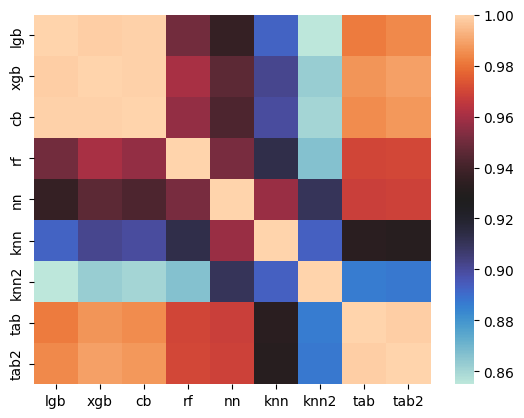

In [150]:
result = pd.DataFrame((y_lgb[:,1]+y_lgb2[:, 1])/2, columns=['lgb'])
result['xgb'] = (y_xgb[:, 1] + y_xgb2[:, 1])/2
result['cb'] = (y_cb[:, 1] + y_cb2[:, 1])/2
result['rf'] = y_rf[:, 1]
result['nn'] = y_nn[:, 1]
result['knn'] = y_xxx[:, 1]
result['knn2'] = y_xxx2[:, 1]
result['tab'] = y_tab[:, 1]
result['tab2'] = y_tab2[:, 1]

corr = result.corr()
ma, mi = corr.max().max(), corr.min().min()
sns.heatmap(corr, vmax=ma, vmin=mi, center=(mi+ma)/2)
corr

# infer

In [151]:
pred_lgb = lgb.predict_proba(df_test[lgb_selected])
pred_xgb = xgb.predict_proba(df_test[lgb_selected])
pred_cb = cb.predict_proba(df_test[lgb_selected])

pred_lgb2 = lgb2.predict_proba(df_test)
pred_xgb2 = xgb2.predict_proba(df_test)
pred_cb2 = cb2.predict_proba(df_test)

pred_rf = rf.predict_proba(df_test)

XX = torch.Tensor(df_test[df_test.columns[:-1]].to_numpy()).to(device)
pred_nn, pred_features = nn_predict_proba(XX, nn_single_model)
pred_features = pred_features.detach().cpu().numpy()

pred_xxx = knn.predict_proba(pred_features)
pred_xxx = calc_new_pred(pred_xxx)

XX = torch.Tensor(df_test[df_test.columns[:-1]].to_numpy()).to(device)
pred_nn2, pred_features = nn_predict_proba(XX, nn_single_model2)
pred_features = pred_features.detach().cpu().numpy()

pred_xxx2 = knn2.predict_proba(pred_features)
pred_xxx2 = calc_new_pred(pred_xxx2)

pred_tab = tab.predict_proba(df_test_noscale[lgb_selected])
pred_tab = calc_new_pred(pred_tab)
pred_tab2 = tab2.predict_proba(df_test_noscale)
pred_tab2 = calc_new_pred(pred_tab2)


# 　全モデルが同じ選択の場合は、正解とする(y_rf除く)ーーーーーーーーーー
th_c0 = xxx_th0
sel0 = (pred_lgb > th_c0)&(pred_lgb2 > th_c0)&(pred_xgb > th_c0)&(pred_xgb2 > th_c0)&(pred_cb > th_c0)&(pred_cb2 > th_c0)&\
        (pred_nn > th_c0)&(pred_xxx > th_c0)&(pred_xxx > th_c0)&(pred_tab > th_c0)&(pred_tab2 > th_c0)
th_c1 = xxx_th1
sel1 = (pred_lgb > th_c1)&(pred_lgb2 > th_c1)&(pred_xgb > th_c1)&(pred_xgb2 > th_c1)&(pred_cb > th_c1)&(pred_cb2 > th_c1)&\
        (pred_nn > th_c1)&(pred_xxx > th_c1)&(pred_xxx > th_c1)&(pred_tab > th_c1)&(pred_tab2 > th_c1)
#ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー




pred = (
    pred_lgb * a[0] + 
    pred_lgb2 * a[1] + 
    pred_xgb * a[2] + 
    pred_xgb2 * a[3] + 
    pred_cb  * a[4] + 
    pred_cb2  * a[5] + 
    pred_rf  * a[6] + 
    pred_nn  * a[7] + 
    pred_nn2  * a[8] + 
    pred_xxx * a[9] + 
    pred_xxx2 * a[10] + 
    pred_tab * a[11] + 
    pred_tab2 * a[12] ) /sum(a)

# print(pred)
    
p0 = pred[:, 0]
p0 = sigmoid((p0-0.5)*xxx_alpha)
p0 = (p0 - min(p0))/(max(p0)-min(p0)+1e-15)

p0[p0 > 0.99] = 1
p0[p0 < 0.01] = 0

# 　全モデルが同じ選択の場合は、正解とする(y_rf除く)ーーーーーーーーーー
p0[sel0[:, 0]] = 1
p0[sel1[:, 1]] = 0
#ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

pred[:,1] = 1-p0
pred[:,0] = p0      


if use_new_pred:
    pred = calc_new_pred(pred)
    
    
pred2 = np.concatenate([pred_lgb, pred_lgb2, pred_xgb ,pred_xgb2, pred_cb, pred_cb2, 
                                      pred_rf, pred_nn, pred_nn2,  pred_xxx, pred_xxx2, pred_tab, pred_tab2, pred], axis=1)
pred2 = lgb_2.predict_proba(pred2)

# pred = (pred + pred2)/2
pred

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [152]:
# if use_new_pred:
#     pred = calc_new_pred(pred)
# pred

In [153]:
submission0 = pd.read_csv('../input/icr-identify-age-related-conditions/sample_submission.csv')
submission0['class_0'] = pred[:,0]
submission0['class_1'] = pred[:,1]

In [154]:
# submission['class_0'] = (submission['class_0'] + submission0['class_0'])/2
# submission['class_1'] = (submission['class_1'] + submission0['class_1'])/2
# submission.head()

In [155]:
submission = pd.read_csv('../input/icr-identify-age-related-conditions/sample_submission.csv')
submission['class_0'] = (submission0['class_0'] + submission1['class_0'])/2
submission['class_1'] = (submission0['class_1'] + submission1['class_1'])/2
submission.head()

,Id,class_0,class_1
0,00eed32682bb,0.302384,0.697616
1,010ebe33f668,0.302384,0.697616
2,02fa521e1838,0.302384,0.697616
3,040e15f562a2,0.302384,0.697616
4,046e85c7cc7f,0.302384,0.697616


In [217]:
p1 = submission['class_0'].to_numpy()
p0 = submission0['class_0'].to_numpy()
sel1 = (p0 == 1)
sel0 = (p0 == 0)
p1[sel1] = 1
p1[sel0] = 0
submission['class_0'] = p1
submission['class_1'] = 1 - p1

In [157]:
# submission['class_0'] = (submission['class_0'] + submission1['class_0'] + submission0['class_0'])/3
# submission['class_1'] = (submission['class_1'] + submission1['class_1'] + submission0['class_1'])/3
# submission.head()

In [158]:
submission.to_csv('submission.csv', index=False)
submission

,Id,class_0,class_1
0,00eed32682bb,0.0,1.0
1,010ebe33f668,0.0,1.0
2,02fa521e1838,0.0,1.0
3,040e15f562a2,0.0,1.0
4,046e85c7cc7f,0.0,1.0
